In [1]:
import os
import pandas as pd
from darts import TimeSeries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from src.metrics import compare_series_metrics

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from src.custom_plots import aggregate_median_metrics, plot_bar_for_medians_by_target, plot_boxplots_for_metrics_by_target, process_results_parquet

## Estilo dos gráficos

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]

In [5]:
sns.set_palette("Paired")

## Lendo o arquivo em parquet

In [6]:
folder_path = os.path.join(os.curdir, "data", "results")

Lendo arquivos multivariados:

In [30]:
dfs = []
folder = os.path.join(os.curdir, "data", "results")
for file in os.listdir(folder):
    if file.endswith('.parquet') and file.startswith('multi_'):
        # Create the full path of the file
        file_path = os.path.join(folder, file)
        # Read the Parquet file and add it to the DataFrame
        mult_df = pd.read_parquet(file_path)
        dfs.append(mult_df)

mult_df = pd.concat(dfs, ignore_index=True)


In [31]:
mult_df

Model                                            Actuals  \
0   LSTM  [-97.0, -10.0, 3.9999999999999987, 14.0, nan, ...   
1   LSTM  [-93.0, -13.0, 0.0, 9.0, -74.0, -93.0, -13.0, ...   
2   LSTM  [-104.0, -13.0, -5.0, 14.0, nan, -104.0, -13.0...   
3   LSTM  [-90.0, -11.0, 1.9999999999999996, 5.999999999...   
4   LSTM  [-102.0, -13.000000000000002, -2.0, 12.0, -86....   
..   ...                                                ...   
78  LSTM  [-67.0, -2.0, -8.0, 10.0, -94.0, -67.0, -2.0, ...   
79  LSTM  [-102.0, -13.999999999999998, 2.99999999999999...   
80  LSTM  [-99.00000000000001, -1.9999999999999987, -2.0...   
81  LSTM  [-101.0, -11.0, 10.0, 11.0, -86.0, -99.0, -13....   
82  LSTM  [-97.0, -21.0, -11.0, 5.0, -93.0, -98.0, -21.0...   

                                                Preds  ElapsedTime  \
0   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   311.019495   
1   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   951.726177   
2   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   750.084753   
3   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   764.222594   
4   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   233.917376   
..                                                ...          ...   
78  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   184.915331   
79  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   485.332180   
80  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   456.051591   
81  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   874.201081   
82  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   124.733055   

        Activity  
0    static_strm  
1    static_strm  
2    static_strm  
3    static_strm  
4    static_strm  
..           ...  
78  driving_strm  
79  driving_strm  
80  driving_strm  
81  driving_strm  
82  driving_strm  

[83 rows x 5 columns]

In [35]:
mult_df["Actuals"][82]

array([ -97.,  -21.,  -11.,    5.,  -93.,  -98.,  -21.,  -11.,    5.,
        -93.,  -98.,  -21.,  -11.,    4.,  -91.,  -99.,  -21.,  -12.,
          4.,  -91.,  -99.,  -21.,  -12.,    4.,  -91., -101.,  -21.,
         -8.,    4.,  -93., -101.,  -21.,   -8.,    4.,  -93., -100.,
        -20.,   -9.,    4.,  -93., -100.,  -20.,   -9.,    4.,  -93.,
       -100.,  -20.,   -9.,    4.,  -93.])

In [33]:
mult_df["Preds"][82]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

### Processando métricas

In [7]:
df = process_results_parquet(folder_path)

In [8]:
df_metrics = compare_series_metrics(df)

TypeError: object of type 'float' has no len()

In [9]:
df_metrics

Time_Index      Model  \
0     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...  AutoARIMA   
1     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...  AutoARIMA   
2     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...  AutoARIMA   
3     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...  AutoARIMA   
4     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...  AutoARIMA   
...                                                 ...        ...   
4118  [2019-12-16T13:04:37.000000000, 2019-12-16T13:...      Theta   
4119  [2019-12-16T13:04:37.000000000, 2019-12-16T13:...      Theta   
4120  [2019-12-16T13:04:37.000000000, 2019-12-16T13:...      Theta   
4121  [2019-12-16T13:04:37.000000000, 2019-12-16T13:...      Theta   
4122  [2019-12-16T13:04:37.000000000, 2019-12-16T13:...      Theta   

                                                Actuals  \
0     [-93.0, -93.0, -93.0, -93.0, -90.0, -90.0, -84...   
1     [-11.000000000000002, -11.000000000000002, -8....   
2     [17.999999999999996, 17.999999999999996, 10.99...   
3     [13.999999999999998, 13.999999999999998, 13.99...   
4     [-81.0, -83.0, -80.66666666666667, -78.3333333...   
...                                                 ...   
4118  [-100.0, -98.0, -98.0, -101.0, -101.0, -99.0, ...   
4119  [-11.999999999999998, -15.000000000000002, -15...   
4120  [0.0, 0.9999999999999998, 0.9999999999999998, ...   
4121  [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   
4122  [-88.0, -86.0, -84.0, -84.0, -84.0, -84.0, -84...   

                                                  Preds  ElapsedTime target  \
0     [-95.0, -95.0, -95.0, -95.0, -95.0, -95.0, -95...    77.848063   RSRP   
1     [-9.5, -9.5, -9.5, -9.5, -9.5, -9.5, -9.5, -9....    74.294680   RSRQ   
2     [14.21970857384788, 12.447609571343477, 12.371...   234.804792    SNR   
3     [14.806906502832225, 15.533572721354117, 16.01...   113.417279    CQI   
4     [-77.58110747224363, -76.24771809655637, -74.5...   114.279108   RSSI   
...                                                 ...          ...    ...   
4118  [-99.74912857013857, -99.74912857013857, -99.7...     2.687724   RSRP   
4119  [-13.930379412303811, -13.840937973047922, -13...     2.753435   RSRQ   
4120  [-2.2370191557572006, -1.8402791318740175, -2....     2.896917    SNR   
4121  [10.93931663683278, 11.272448291793655, 10.957...     2.234292    CQI   
4122  [-87.50017820445555, -87.50017820445555, -87.5...     2.448266   RSSI   

          Activity       MAE       RMSE         MSE     NRMSE      NMSE  
0     driving_down  3.719343   6.011965   36.143722  0.111333  0.248253  
1     driving_down  5.602078   9.358424   87.580094  0.492549  2.668235  
2     driving_down  5.862350  11.036607  121.806690  0.262776  1.677281  
3     driving_down  2.190114   3.751897   14.076730  0.312658  1.921447  
4     driving_down  3.264922   6.133432   37.618993  0.142638  0.219335  
...            ...       ...        ...         ...       ...       ...  
4118   static_strm  0.803266   1.252122    1.567808  0.089437  0.563167  
4119   static_strm  1.597373   2.073073    4.297631  0.188461  1.225408  
4120   static_strm  3.607735   4.598114   21.142652  0.229906  1.795391  
4121   static_strm  1.211759   1.889297    3.569444  0.209922  1.123173  
4122   static_strm  1.391706   2.568227    6.595788  0.160514  0.651558  

[4060 rows x 12 columns]

In [10]:
# TODO: Verificar por que não está salvando dentro da pasta .;data
try:
    metrics_path = os.path.join(
    os.curdir, "data", "last_metrics_univariate.parquet"
)

    # Cria o diretório se não existir
    os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
    # Concatena todos os DataFrames e realiza o processamento
    df_metrics.to_parquet(metrics_path, compression="gzip")
except Exception as e:
    print(f"Não foi possivel salvar: {e}")

In [11]:
df_metrics.columns

Index(['Time_Index', 'Model', 'Actuals', 'Preds', 'ElapsedTime', 'target',
       'Activity', 'MAE', 'RMSE', 'MSE', 'NRMSE', 'NMSE'],
      dtype='object')

In [12]:
df_metrics[["Model", "target", "Activity","MAE", "RMSE", "MSE", "ElapsedTime"]]

Model target      Activity       MAE       RMSE         MSE  \
0     AutoARIMA   RSRP  driving_down  3.719343   6.011965   36.143722   
1     AutoARIMA   RSRQ  driving_down  5.602078   9.358424   87.580094   
2     AutoARIMA    SNR  driving_down  5.862350  11.036607  121.806690   
3     AutoARIMA    CQI  driving_down  2.190114   3.751897   14.076730   
4     AutoARIMA   RSSI  driving_down  3.264922   6.133432   37.618993   
...         ...    ...           ...       ...        ...         ...   
4118      Theta   RSRP   static_strm  0.803266   1.252122    1.567808   
4119      Theta   RSRQ   static_strm  1.597373   2.073073    4.297631   
4120      Theta    SNR   static_strm  3.607735   4.598114   21.142652   
4121      Theta    CQI   static_strm  1.211759   1.889297    3.569444   
4122      Theta   RSSI   static_strm  1.391706   2.568227    6.595788   

      ElapsedTime  
0       77.848063  
1       74.294680  
2      234.804792  
3      113.417279  
4      114.279108  
...           ...  
4118     2.687724  
4119     2.753435  
4120     2.896917  
4121     2.234292  
4122     2.448266  

[4060 rows x 7 columns]

In [13]:
agg_data = aggregate_median_metrics(df_metrics)
agg_data

Model target      Activity  MAE_Median  RMSE_Median  MSE_Median  \
0    AutoARIMA    CQI  driving_down    2.398447     3.724079   13.868766   
1    AutoARIMA    CQI  driving_strm    2.190102     3.509033   12.313567   
2    AutoARIMA    CQI   static_down    1.961056     3.072910    9.442774   
3    AutoARIMA    CQI   static_strm    1.867865     3.671542   13.480236   
4    AutoARIMA   RSRP  driving_down    3.872495     6.884006   47.398690   
..         ...    ...           ...         ...          ...         ...   
195      Theta   RSSI   static_strm    1.239372     1.810013    3.277169   
196      Theta    SNR  driving_down    4.648094     6.832039   46.676761   
197      Theta    SNR  driving_strm    4.821716     7.006719   49.095789   
198      Theta    SNR   static_down    3.034527     4.003493   16.027956   
199      Theta    SNR   static_strm    3.779683     4.883486   23.929868   

     NRMSE_Median  NMSE_Median  
0        0.295248     1.565749  
1        0.256934     1.362328  
2        0.259988     2.332594  
3        0.319009     2.526466  
4        0.109356     0.347116  
..            ...          ...  
195      0.102991     0.766946  
196      0.160329     0.848370  
197      0.158863     0.718438  
198      0.170059     1.482056  
199      0.201572     1.491728  

[200 rows x 8 columns]

## Bar plots das médias.

Paleta de cores:

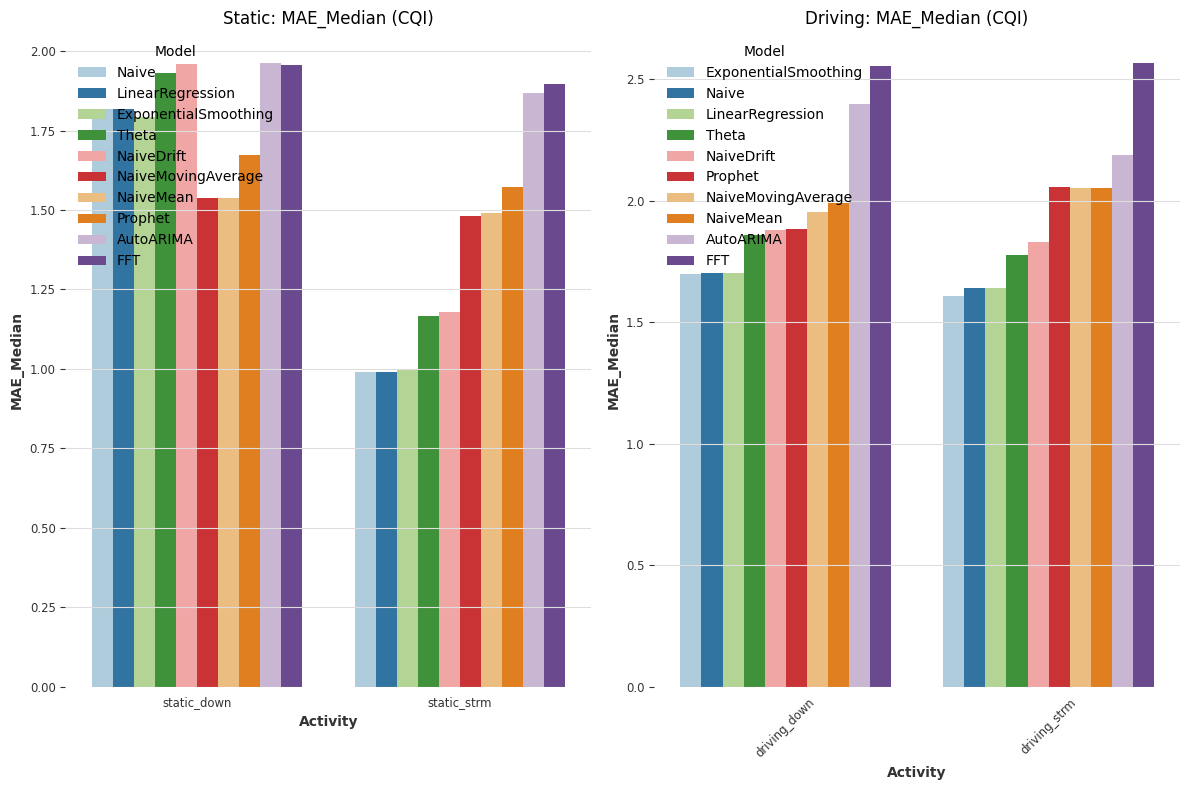

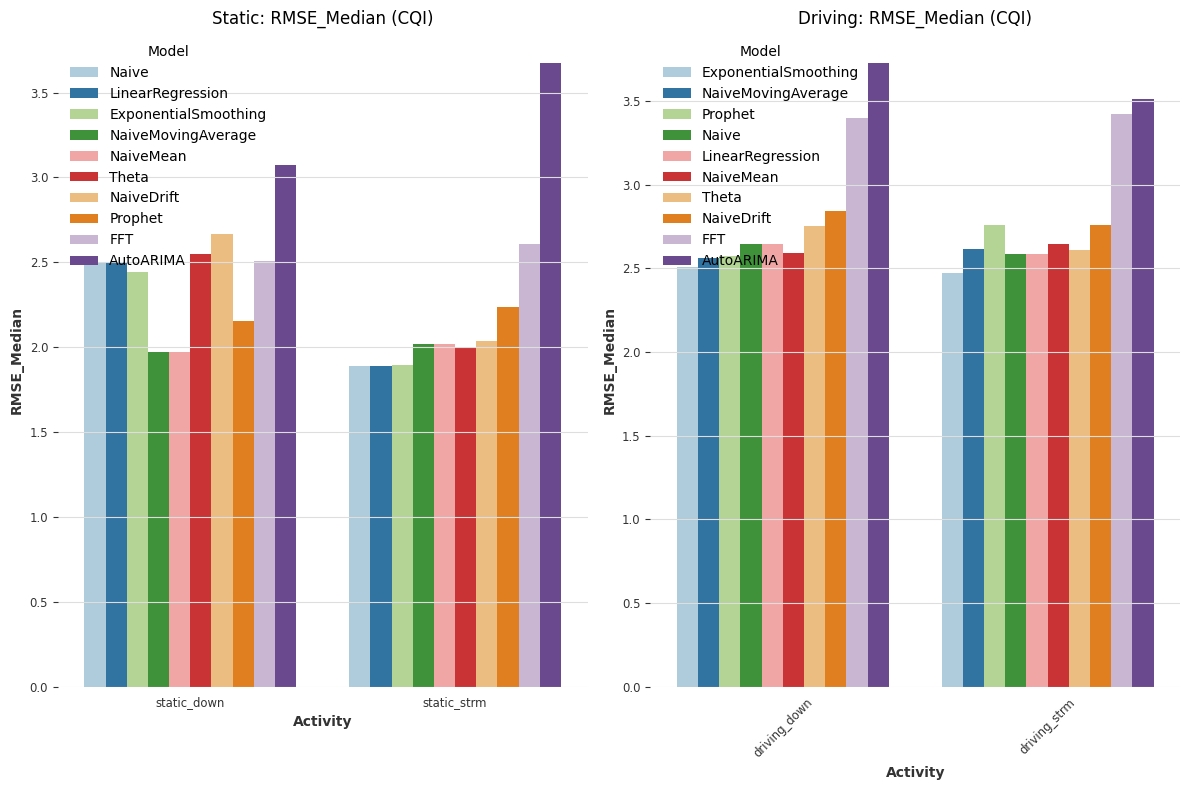

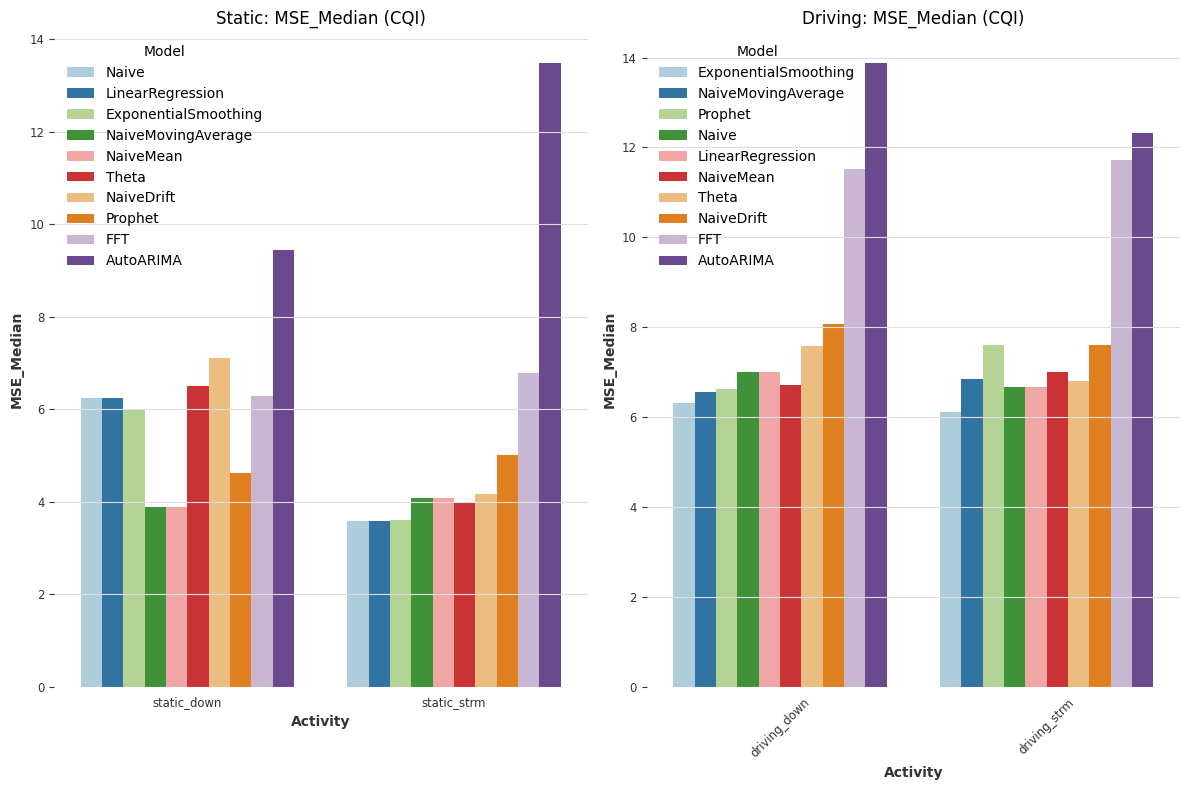

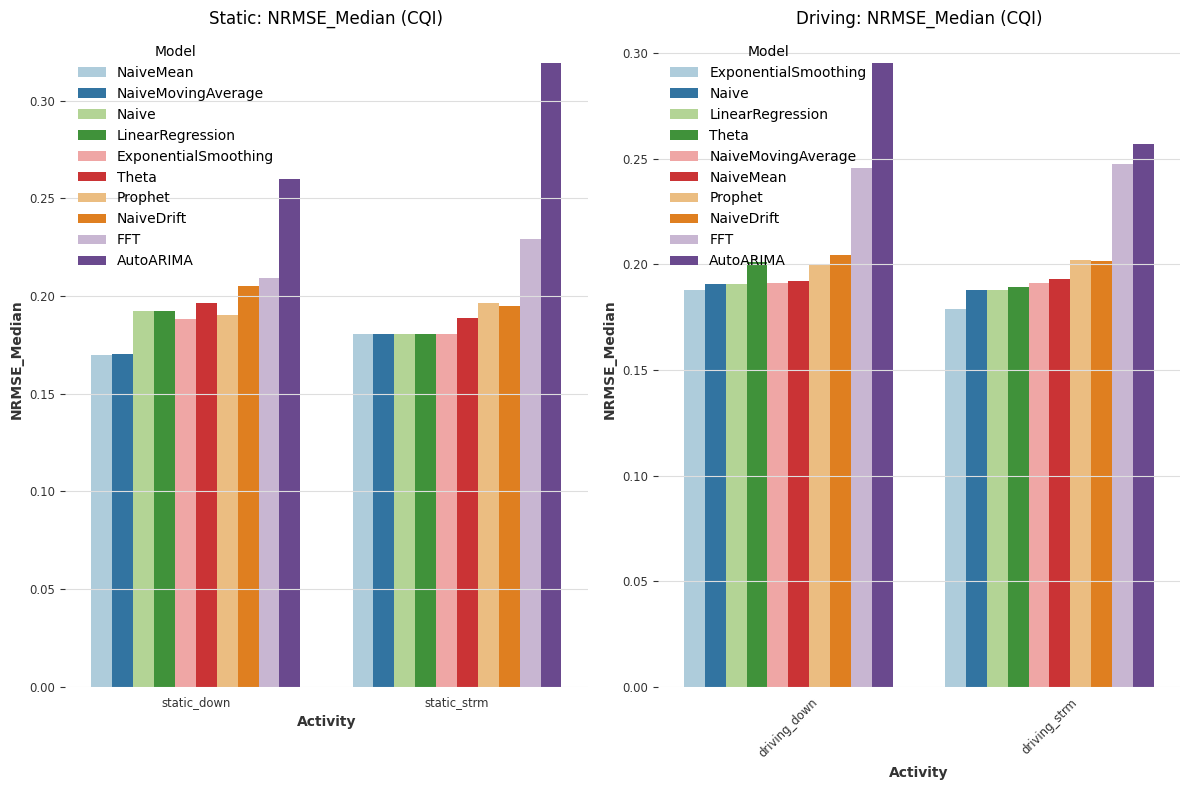

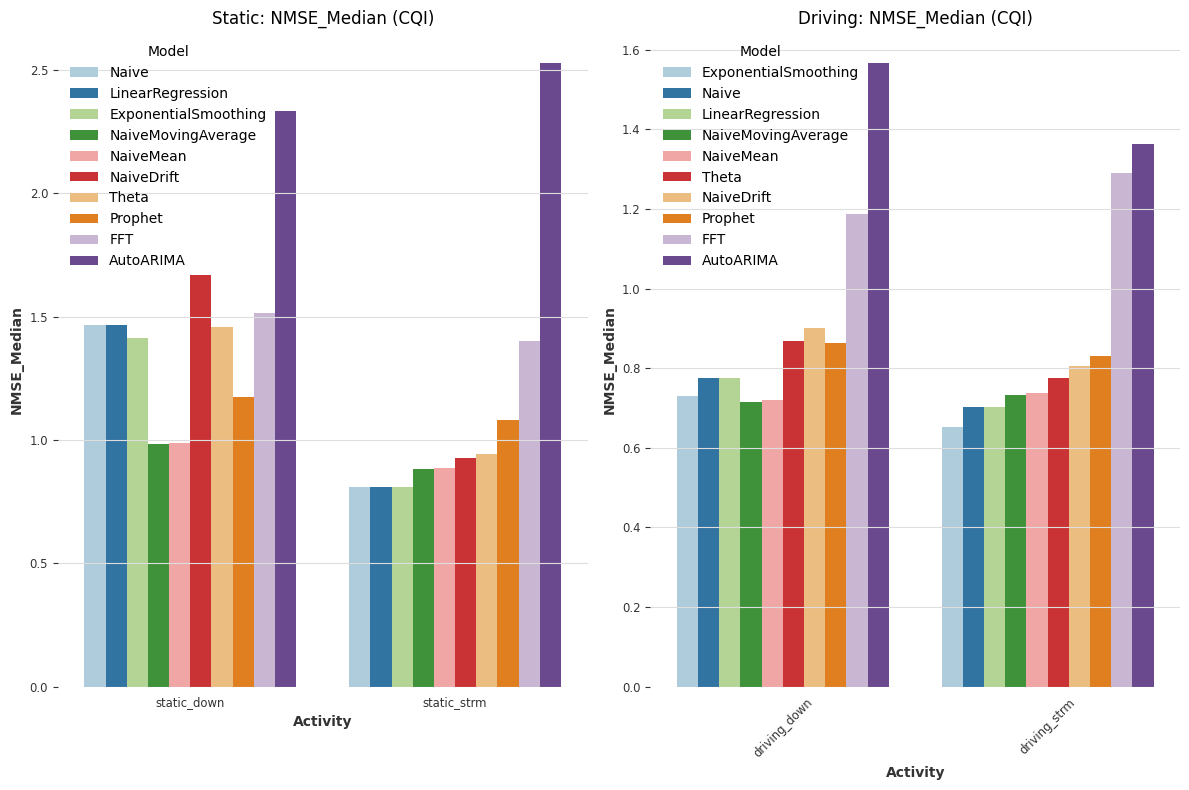

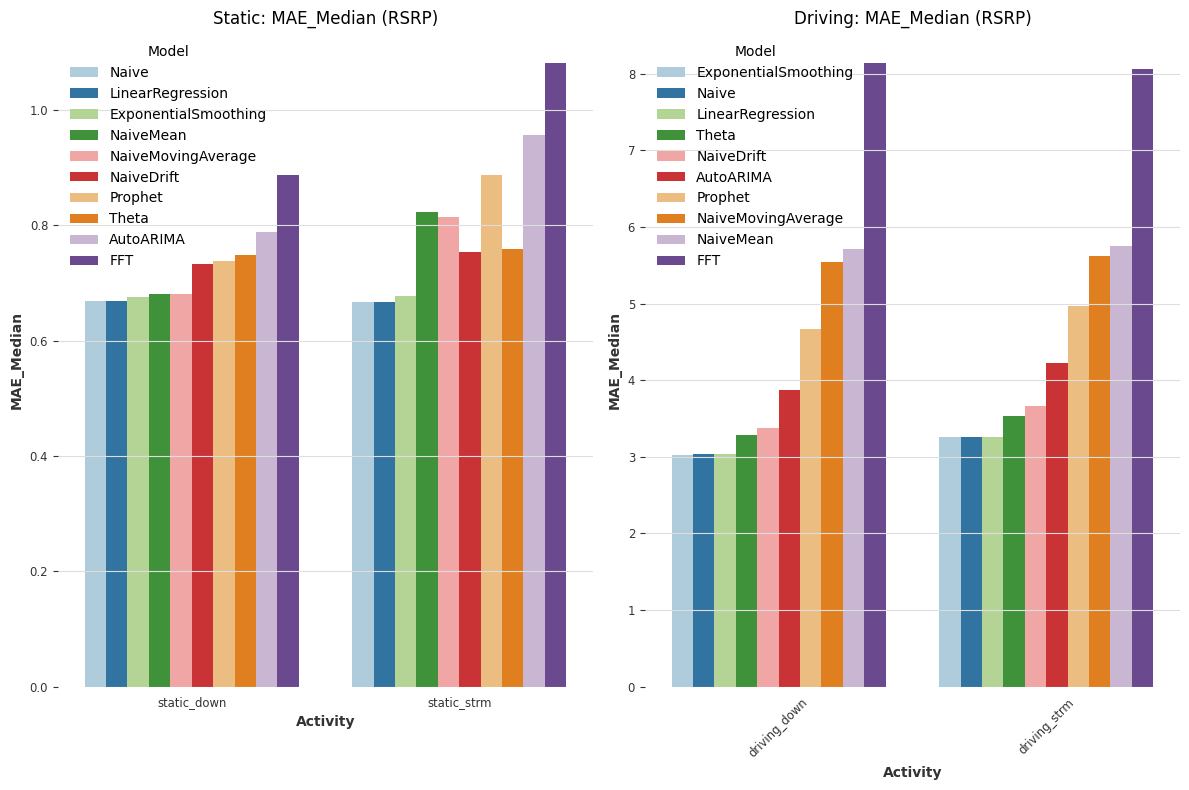

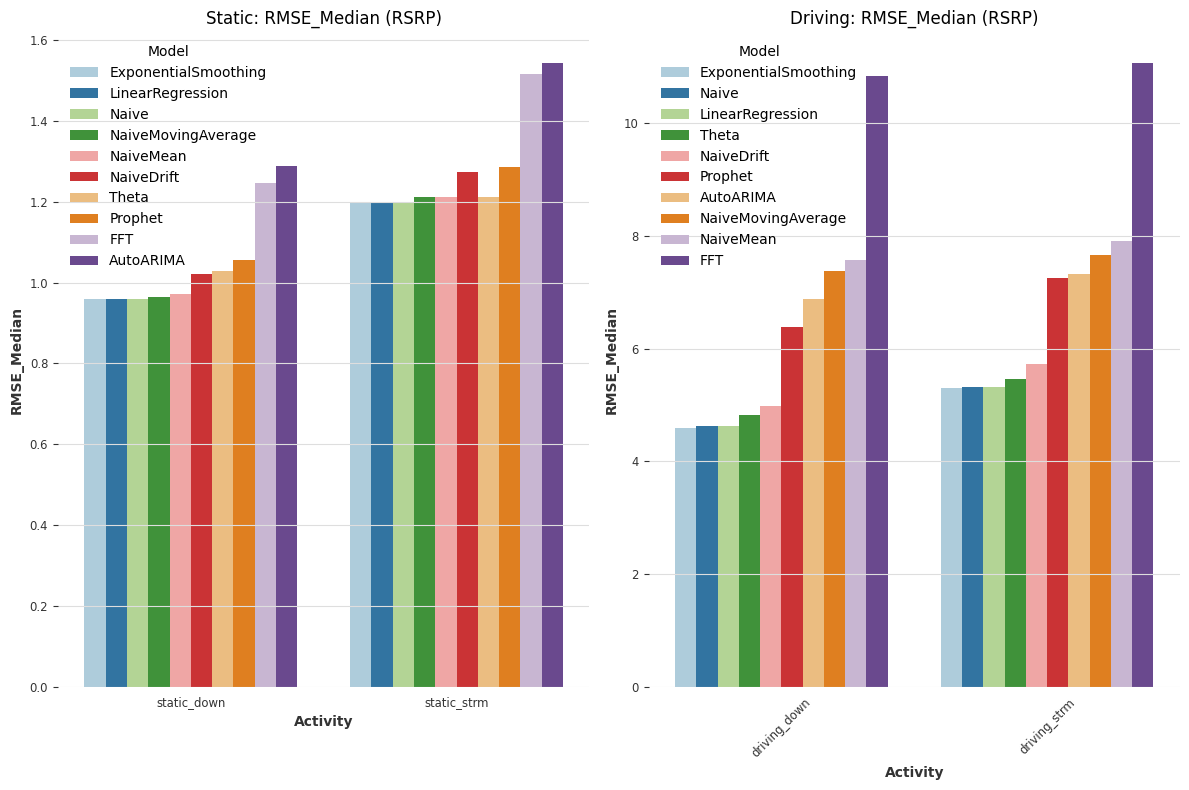

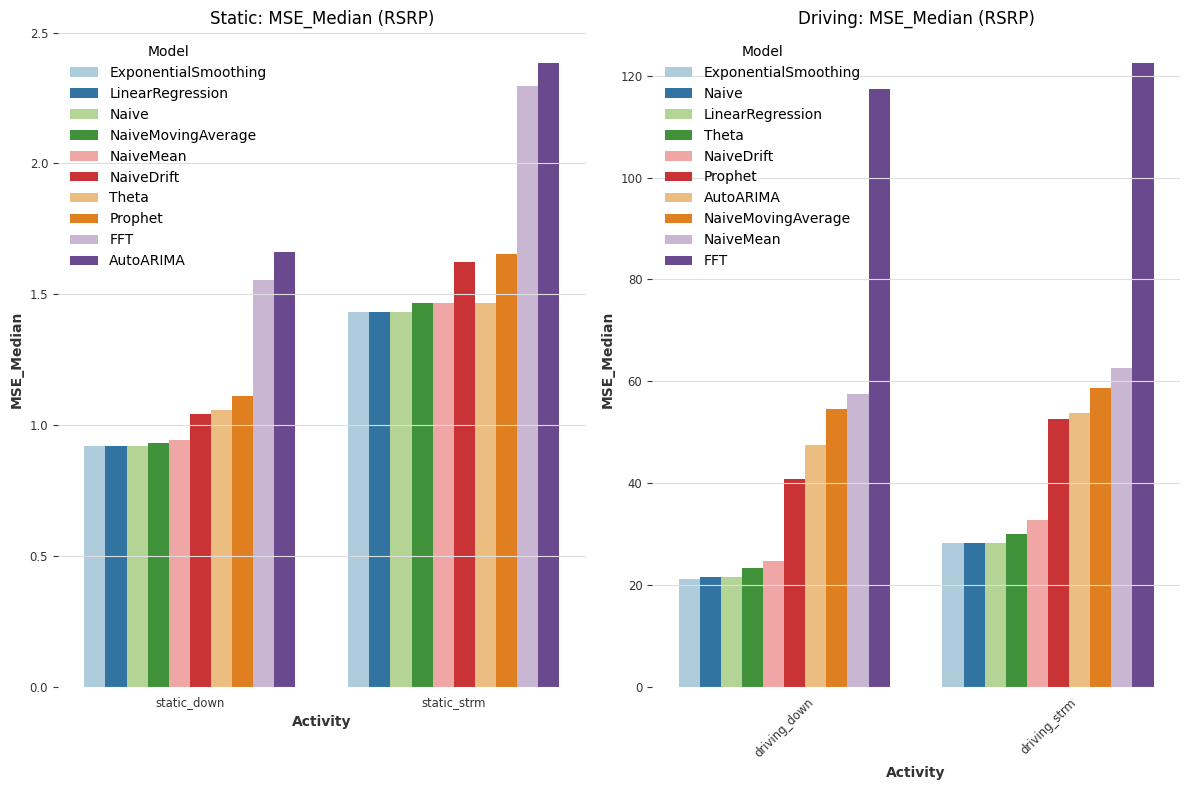

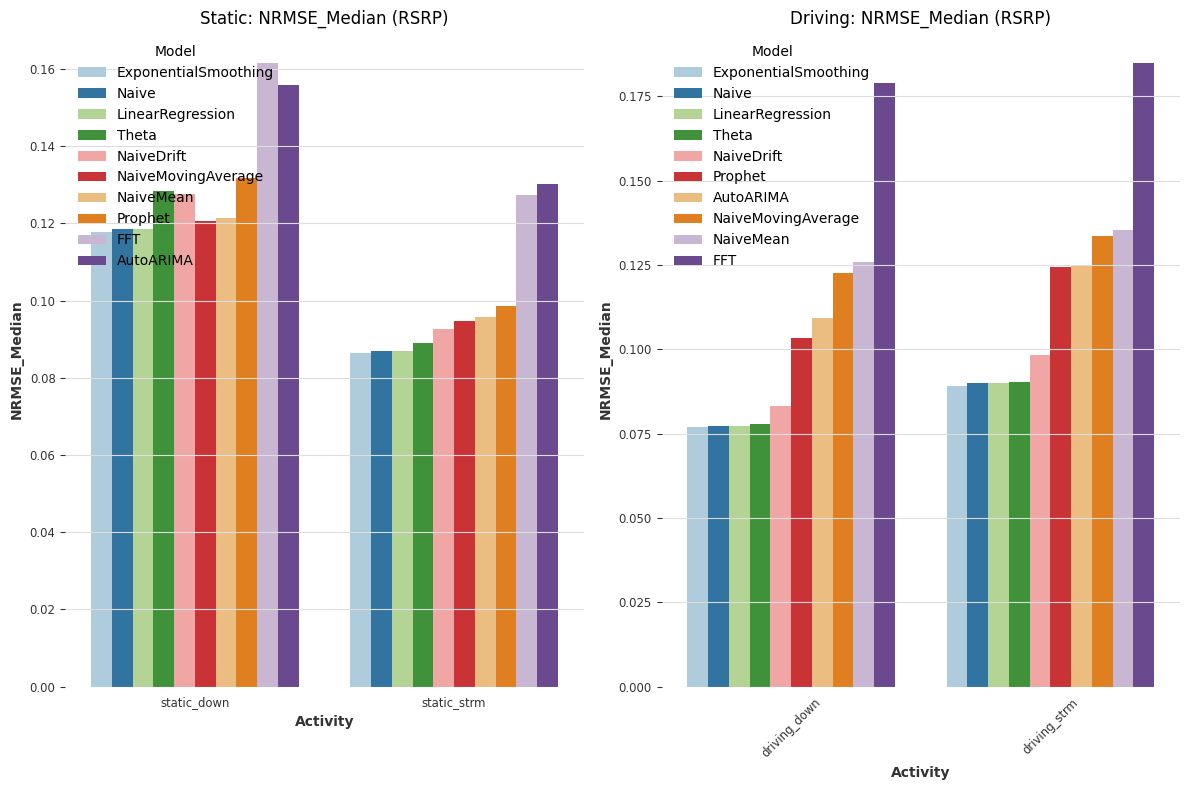

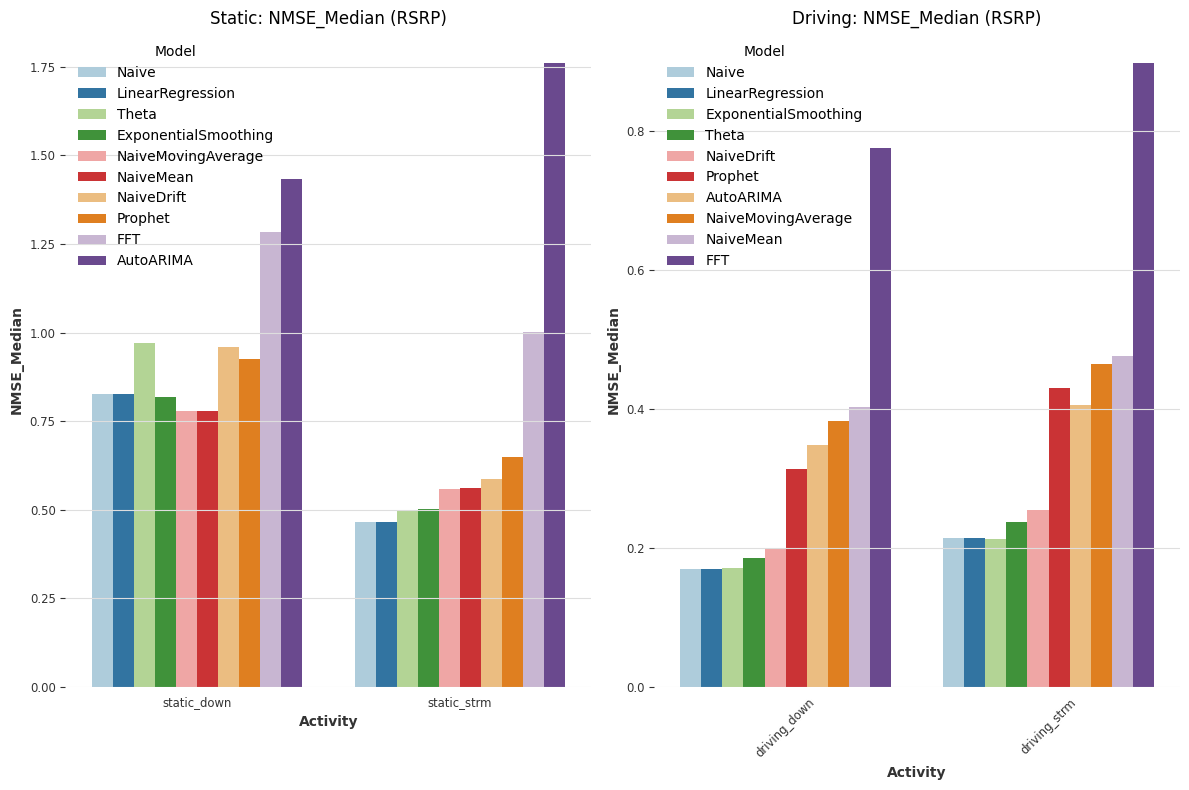

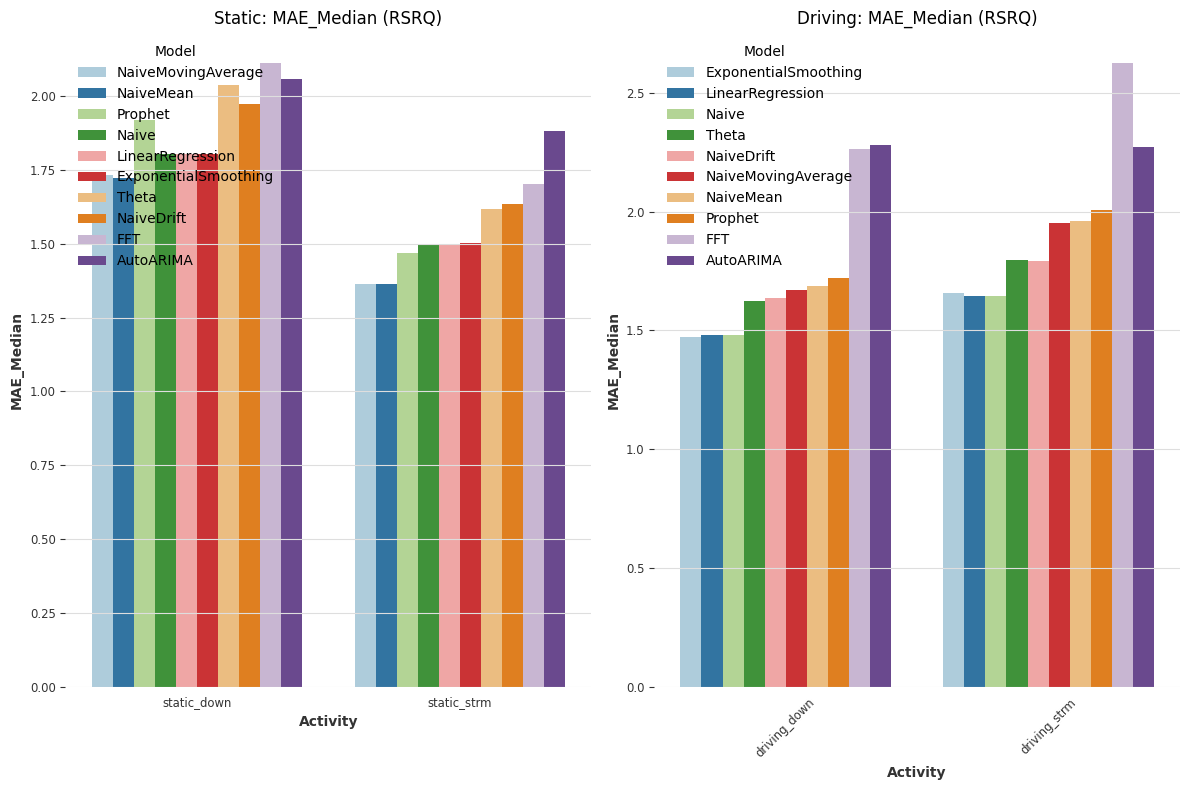

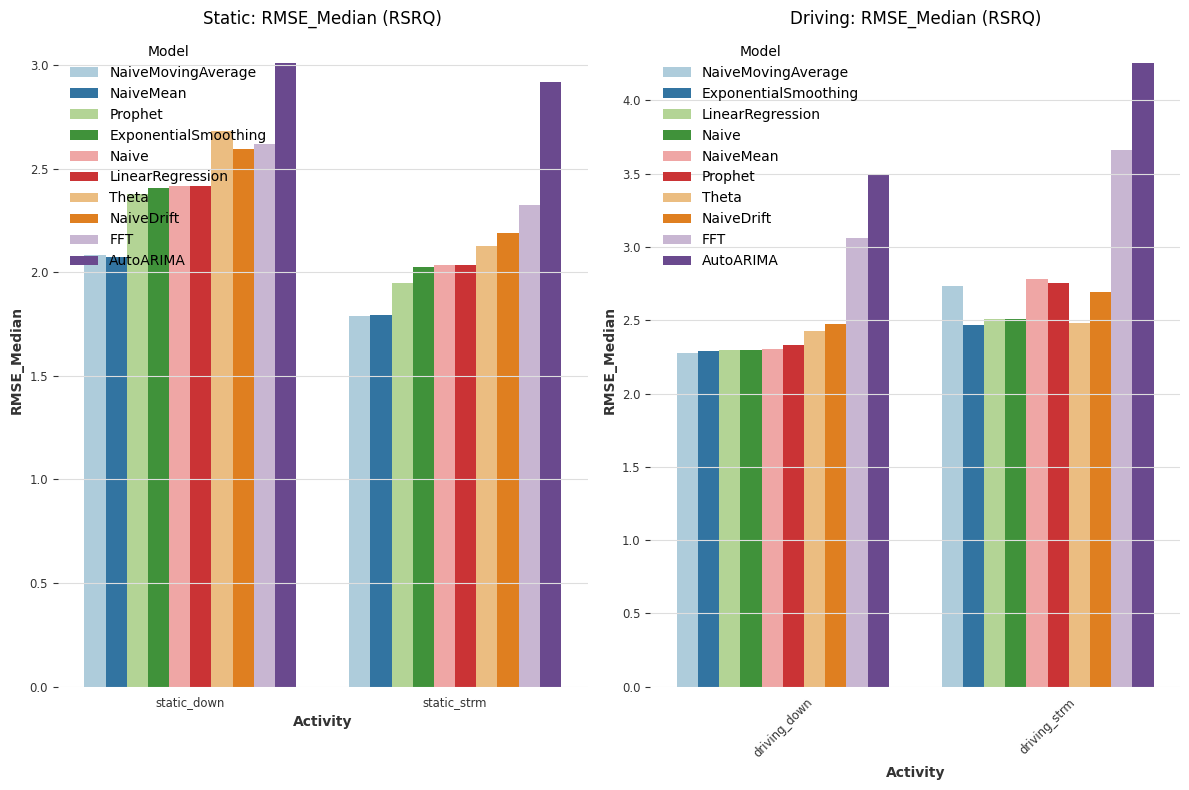

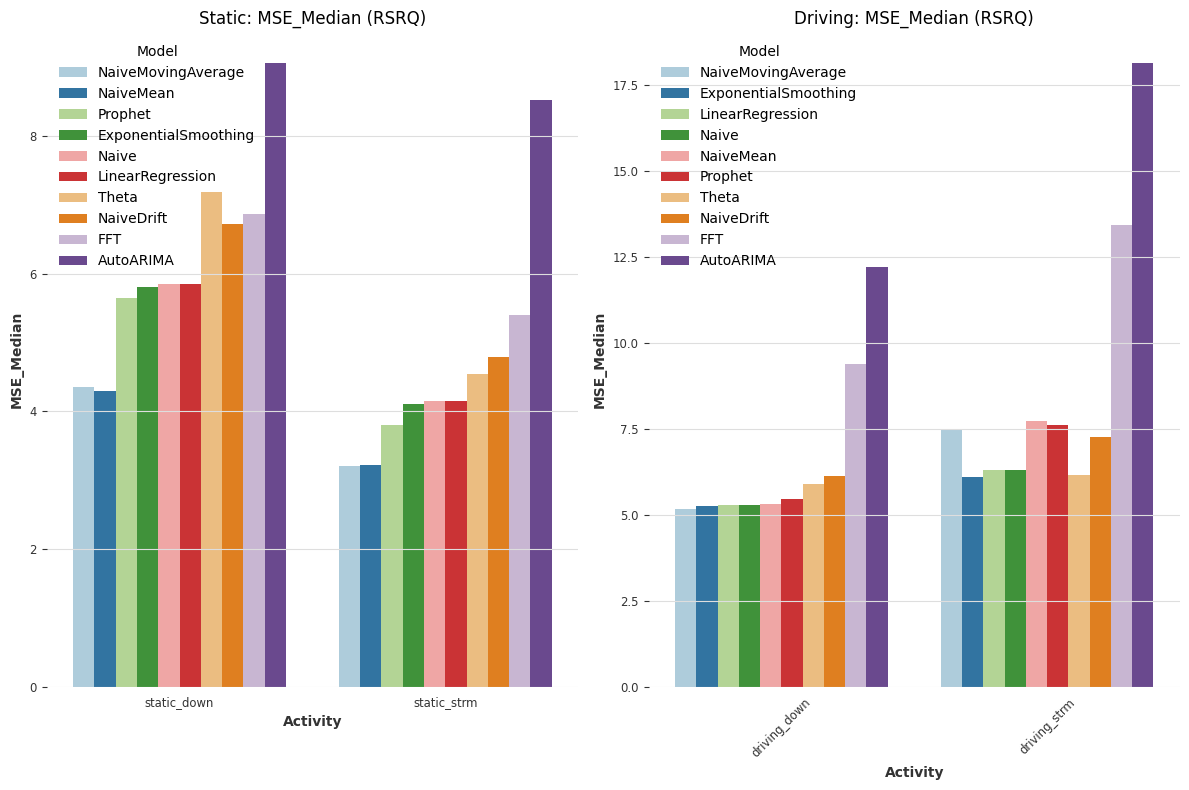

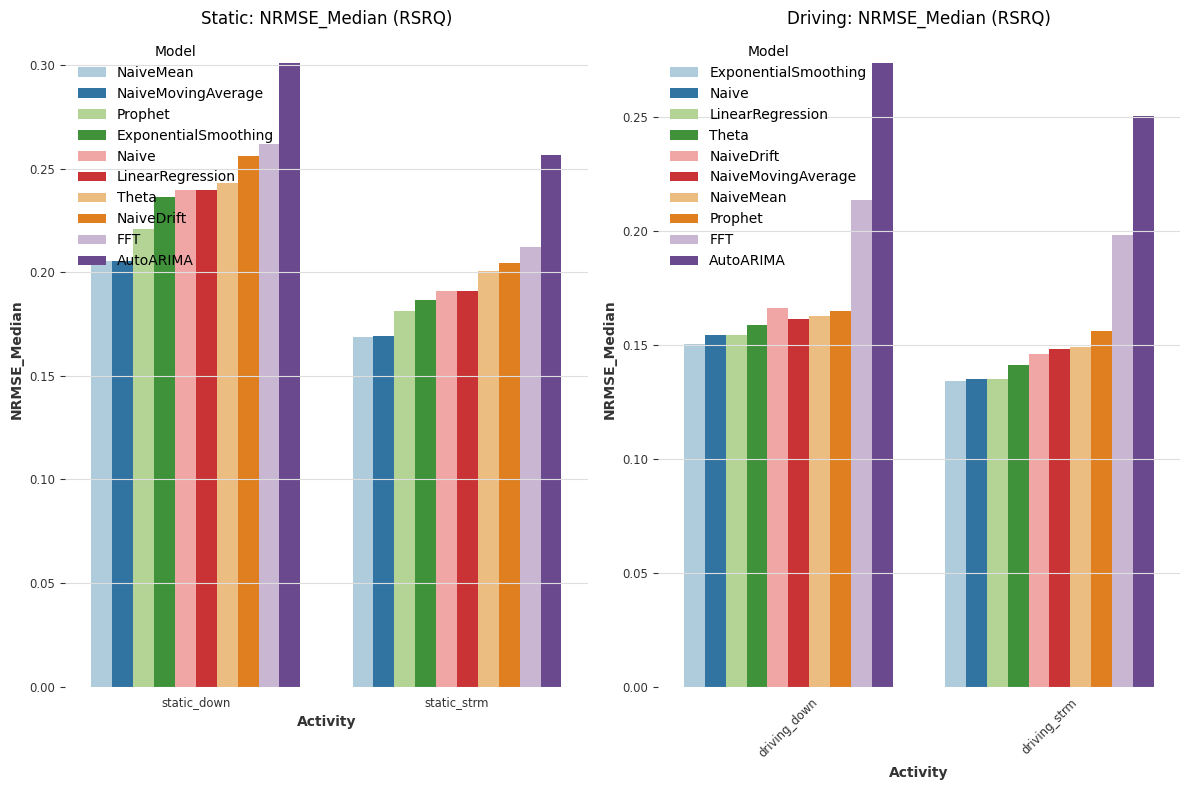

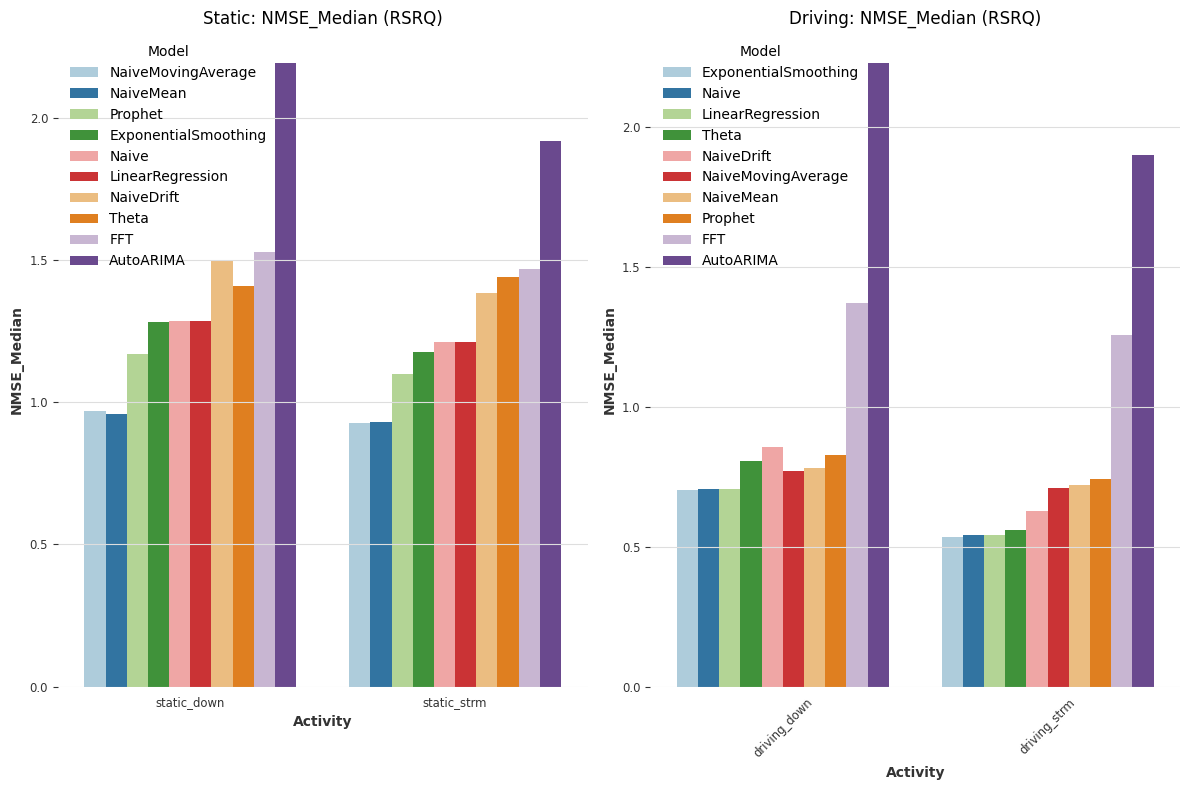

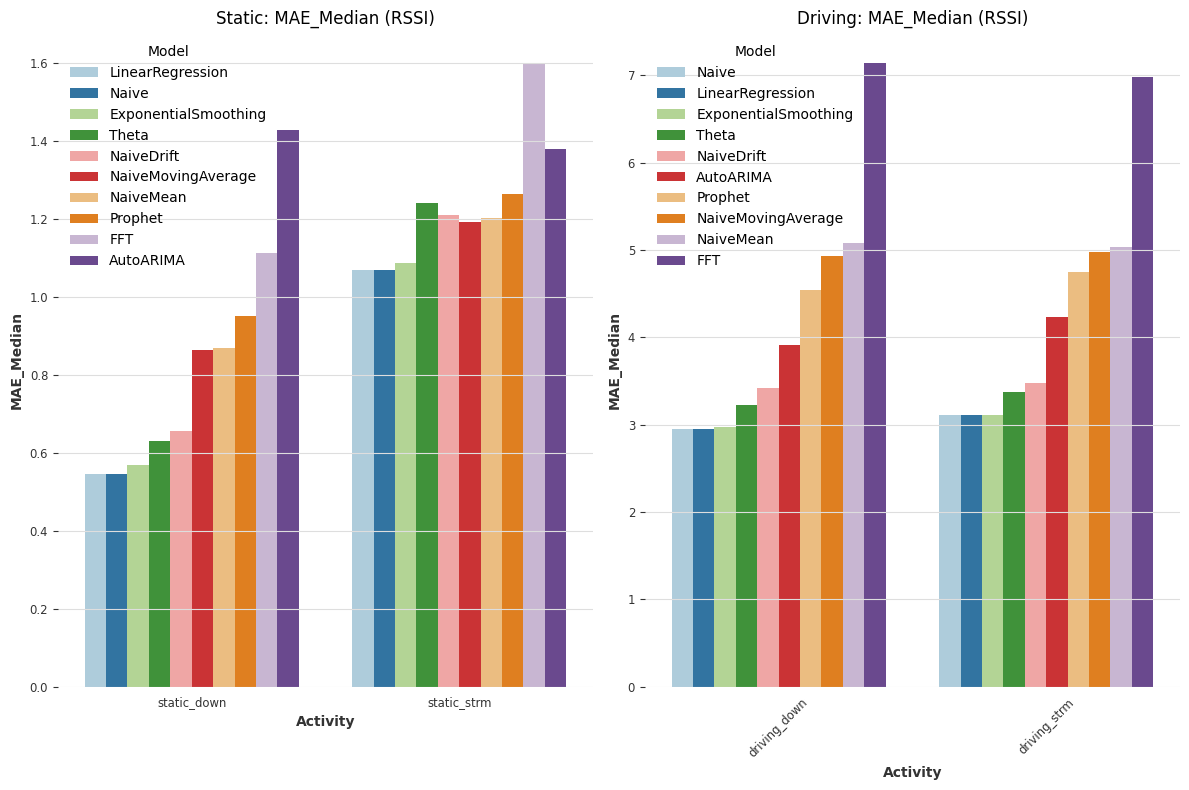

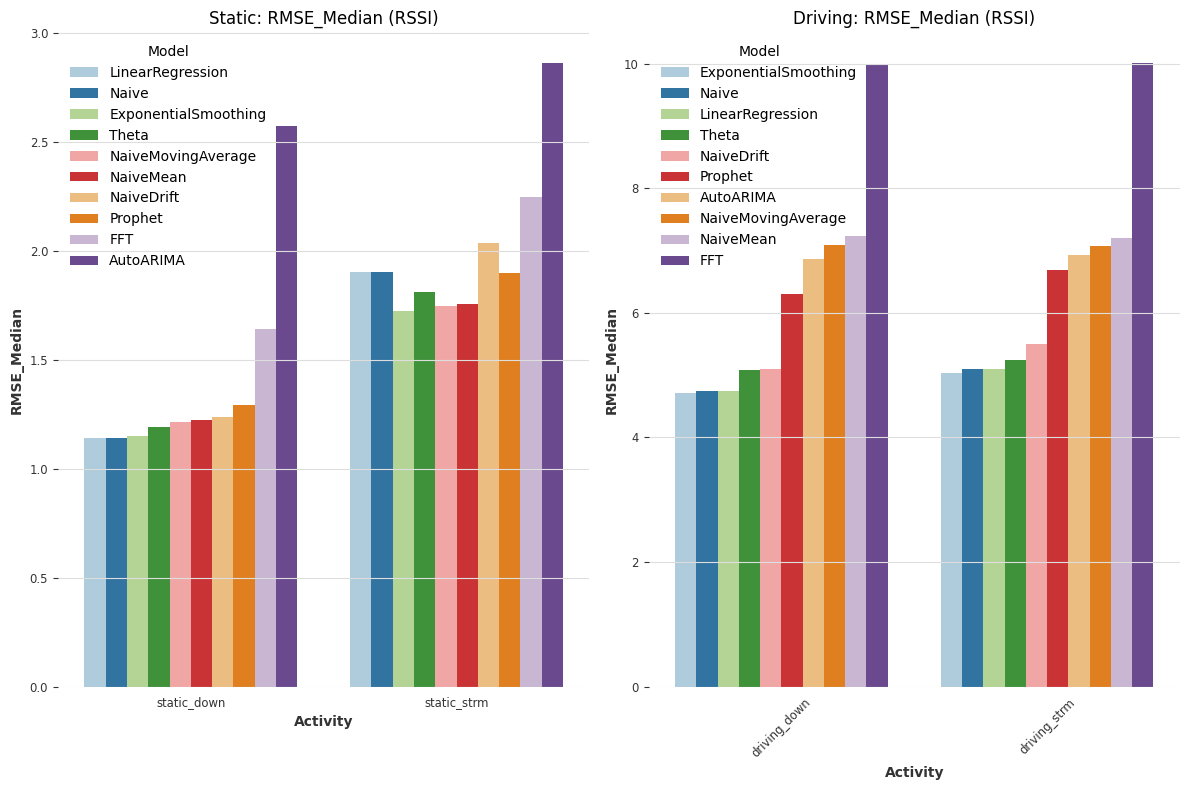

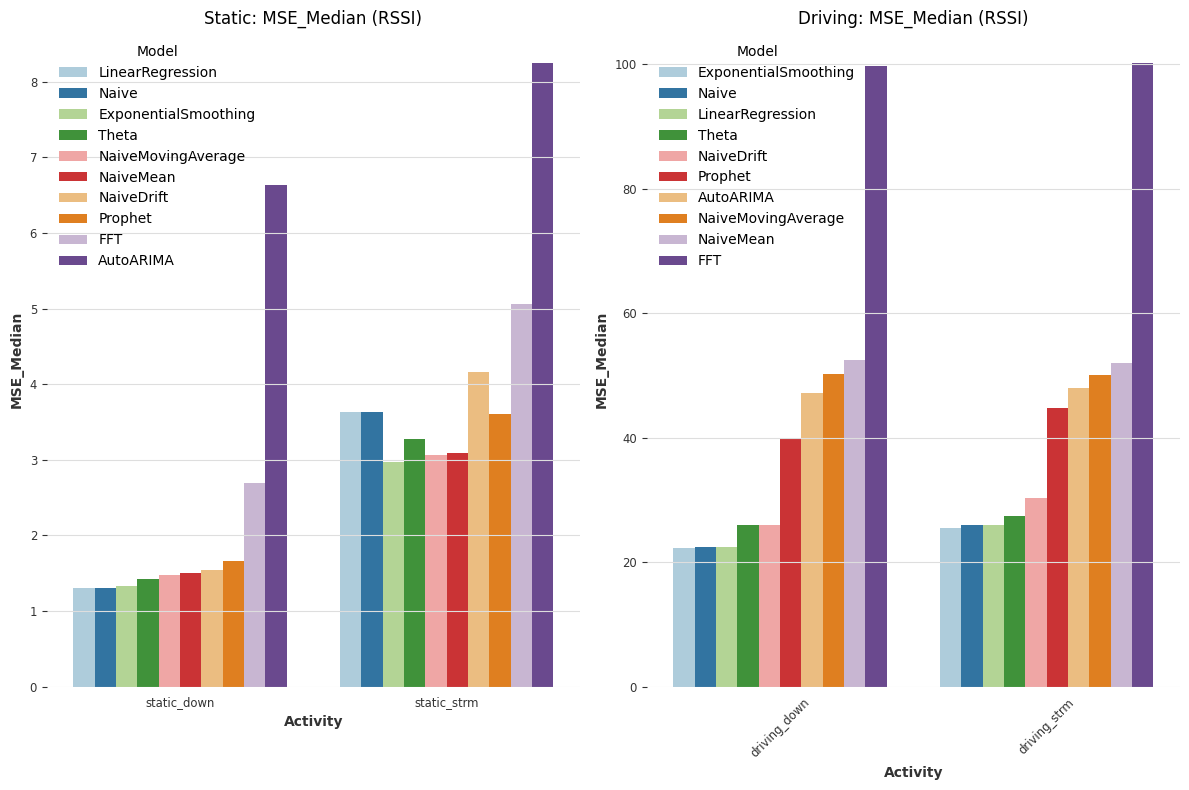

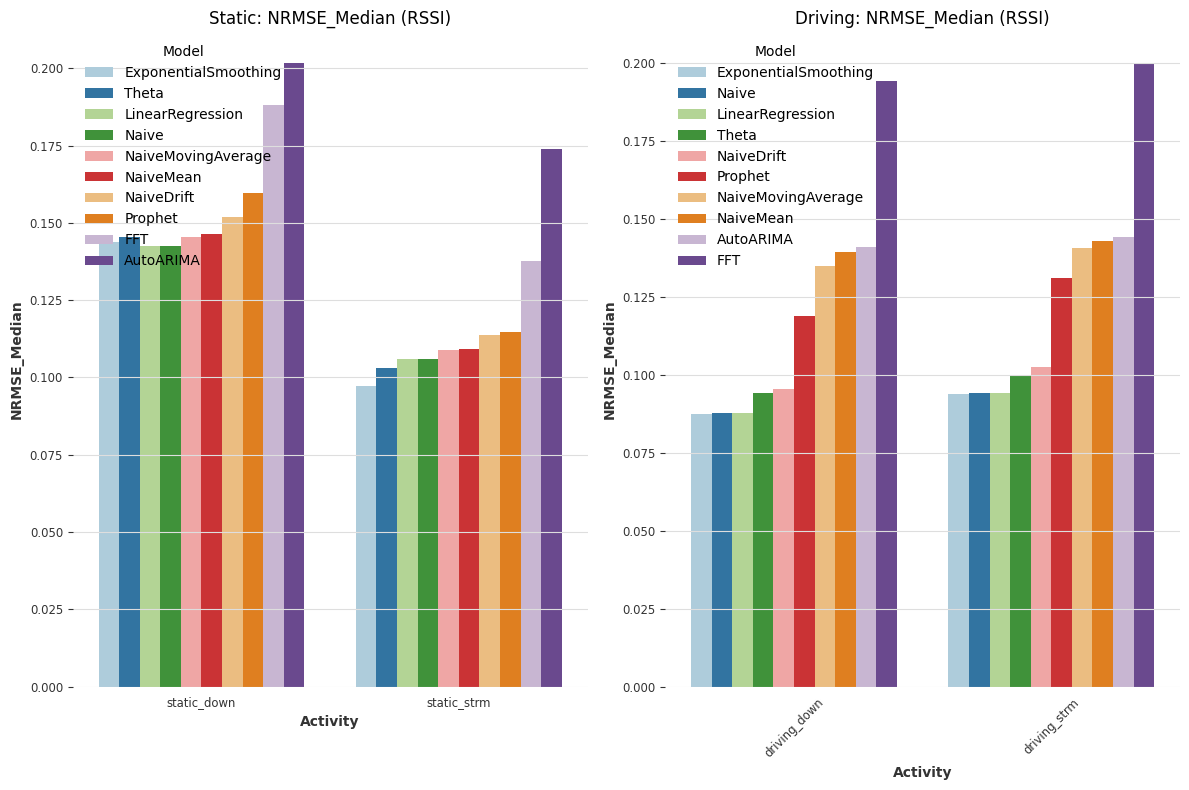

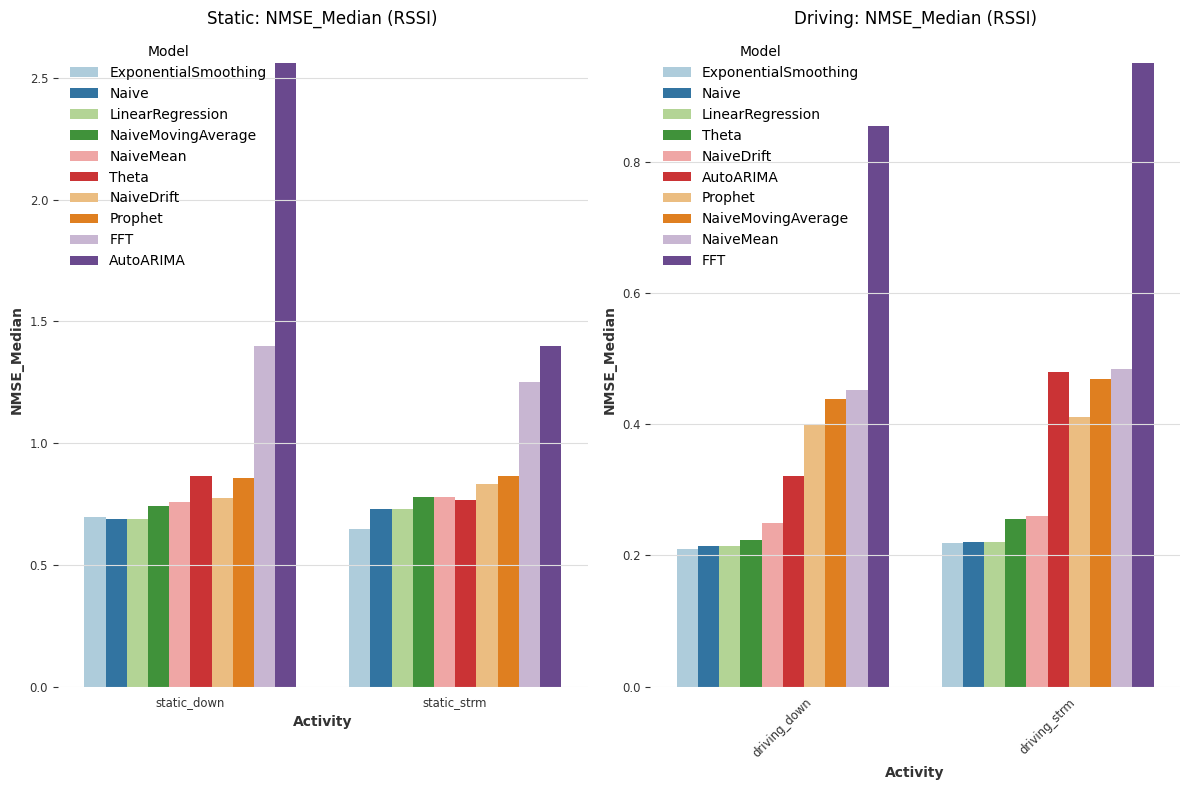

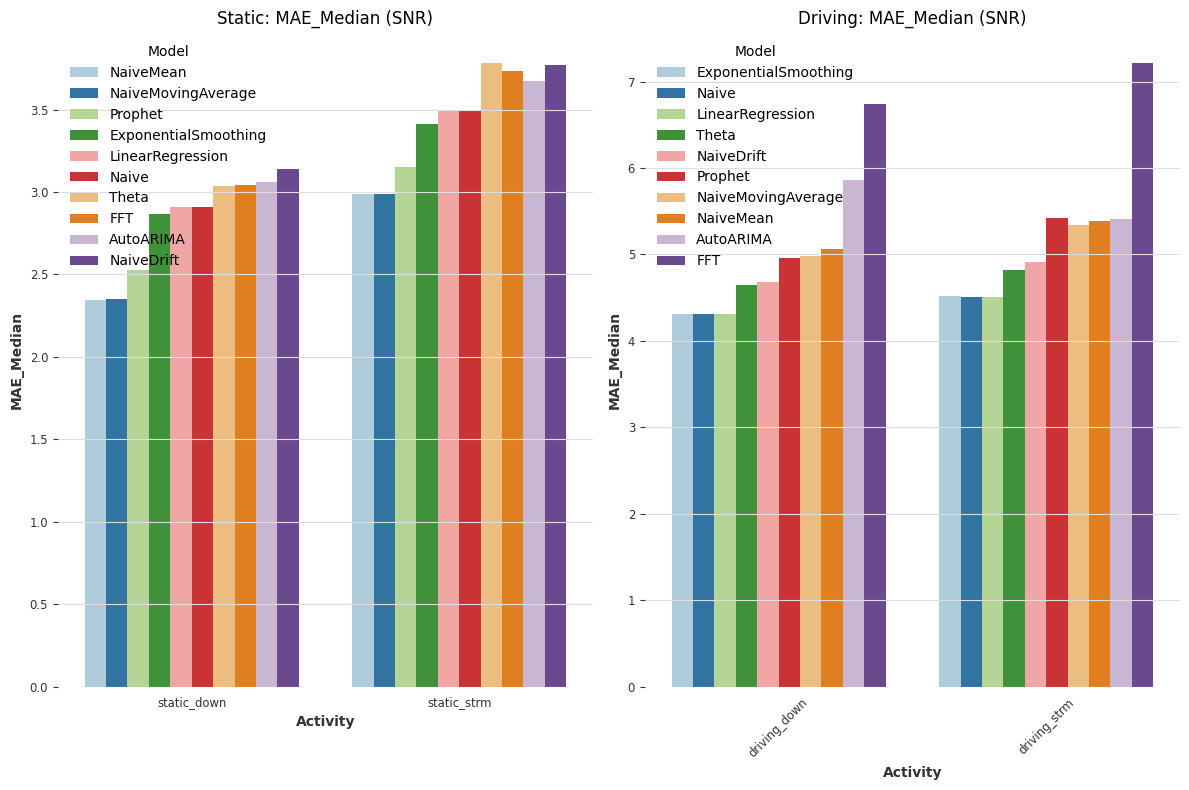

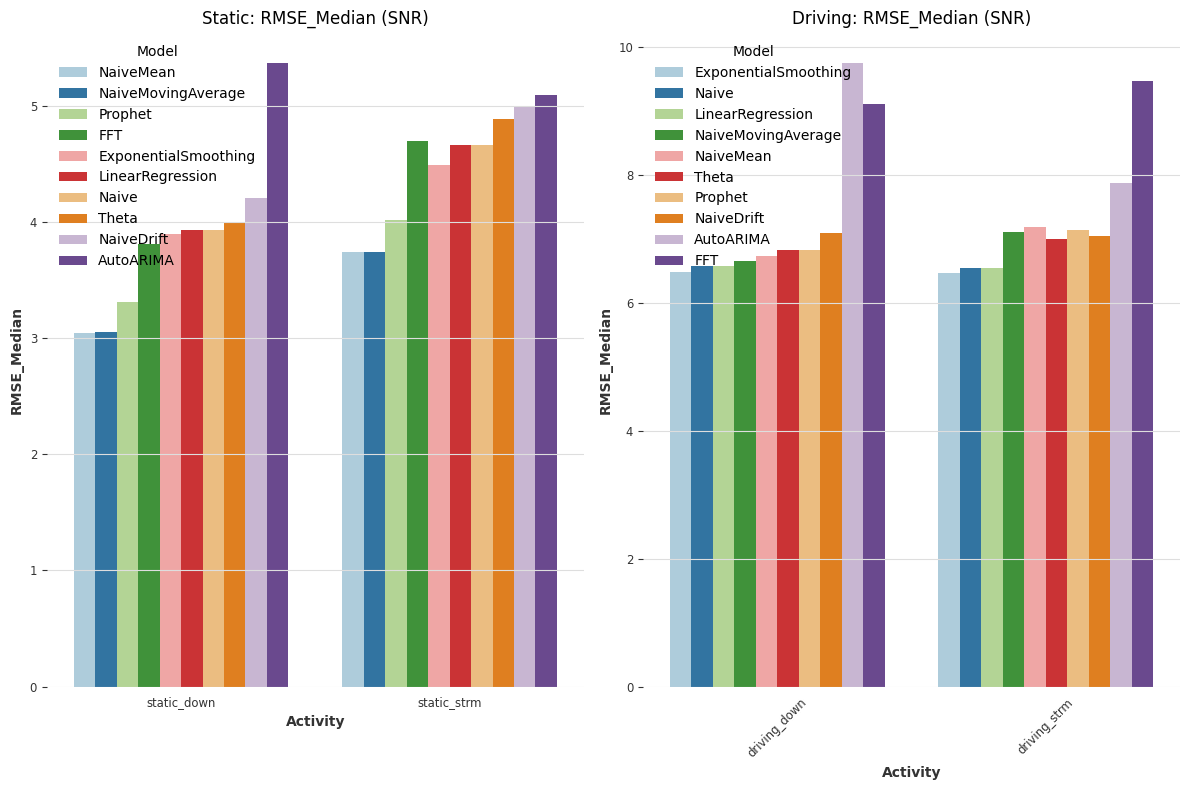

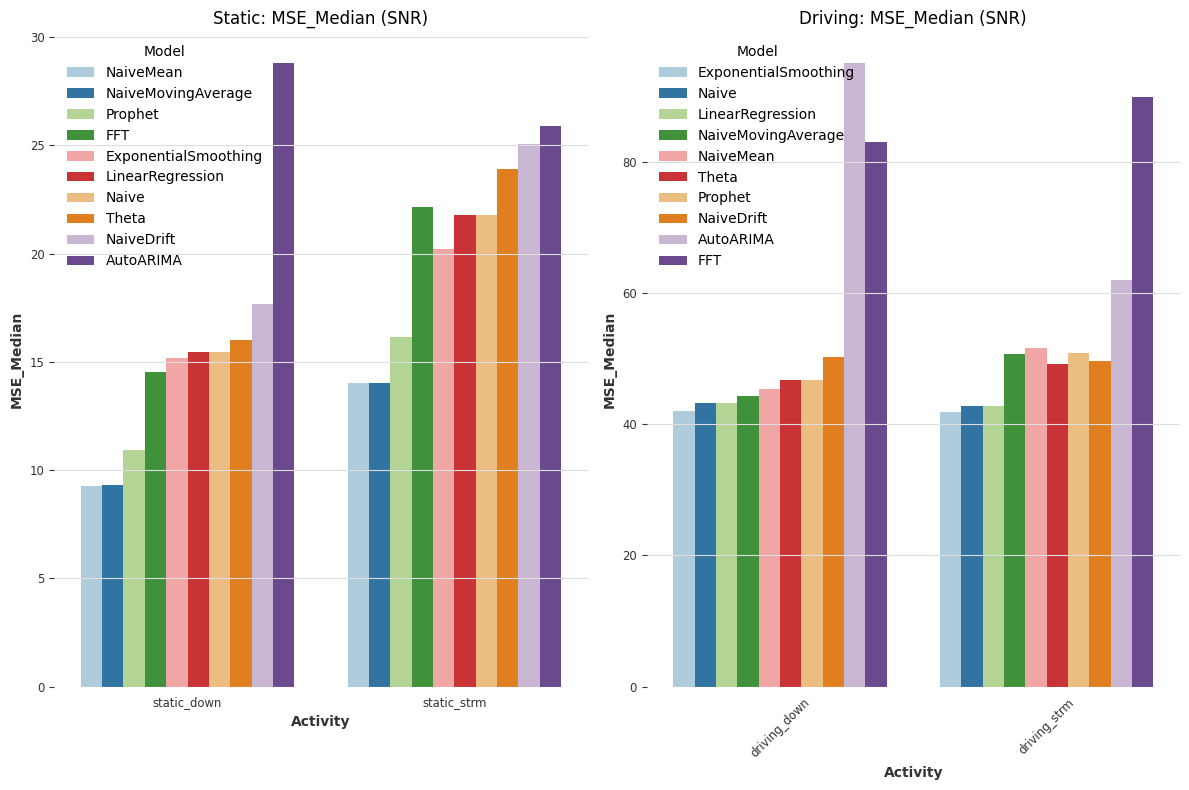

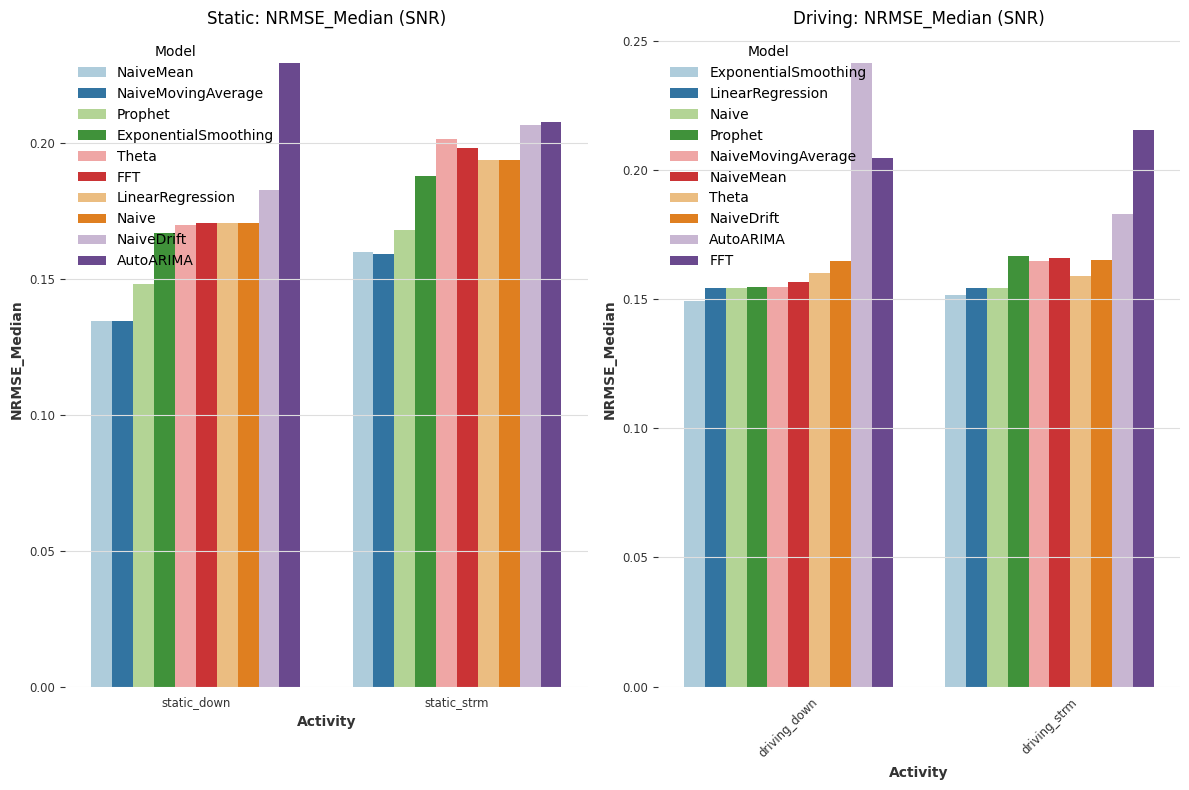

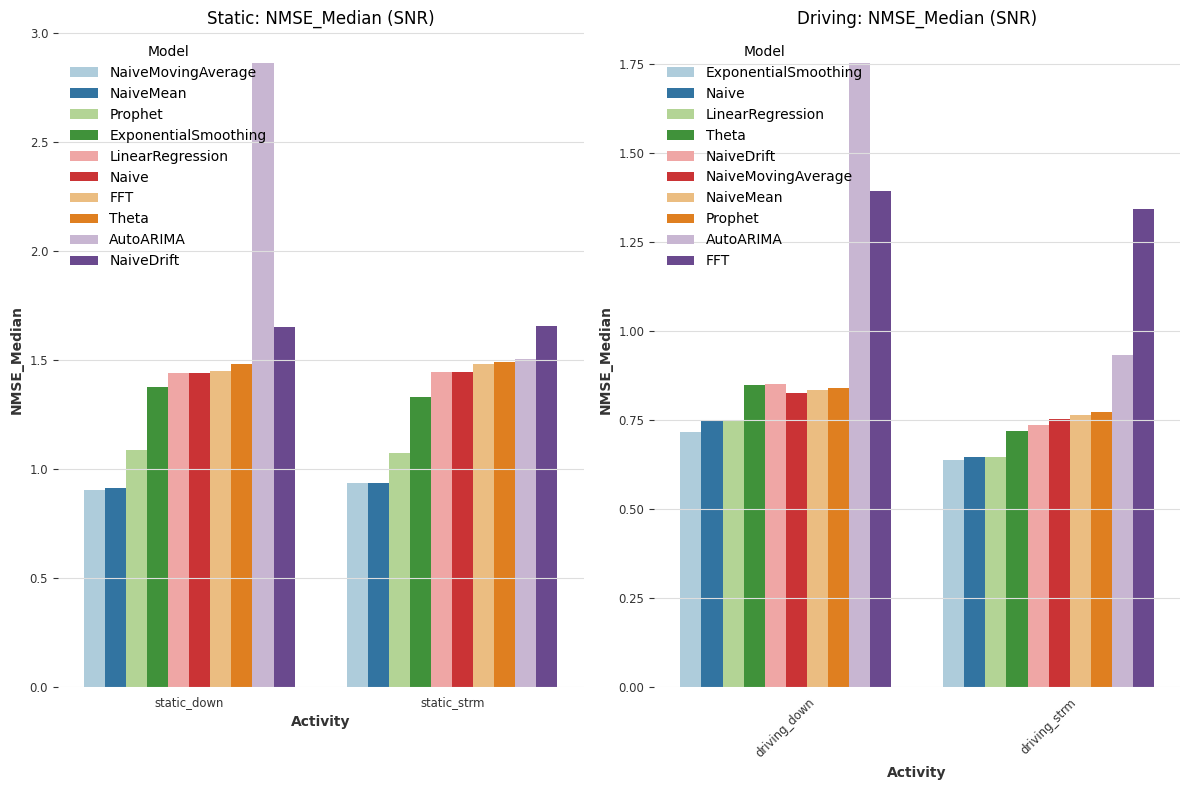

In [14]:
plot_bar_for_medians_by_target(agg_data)

## Boxplot das métricas

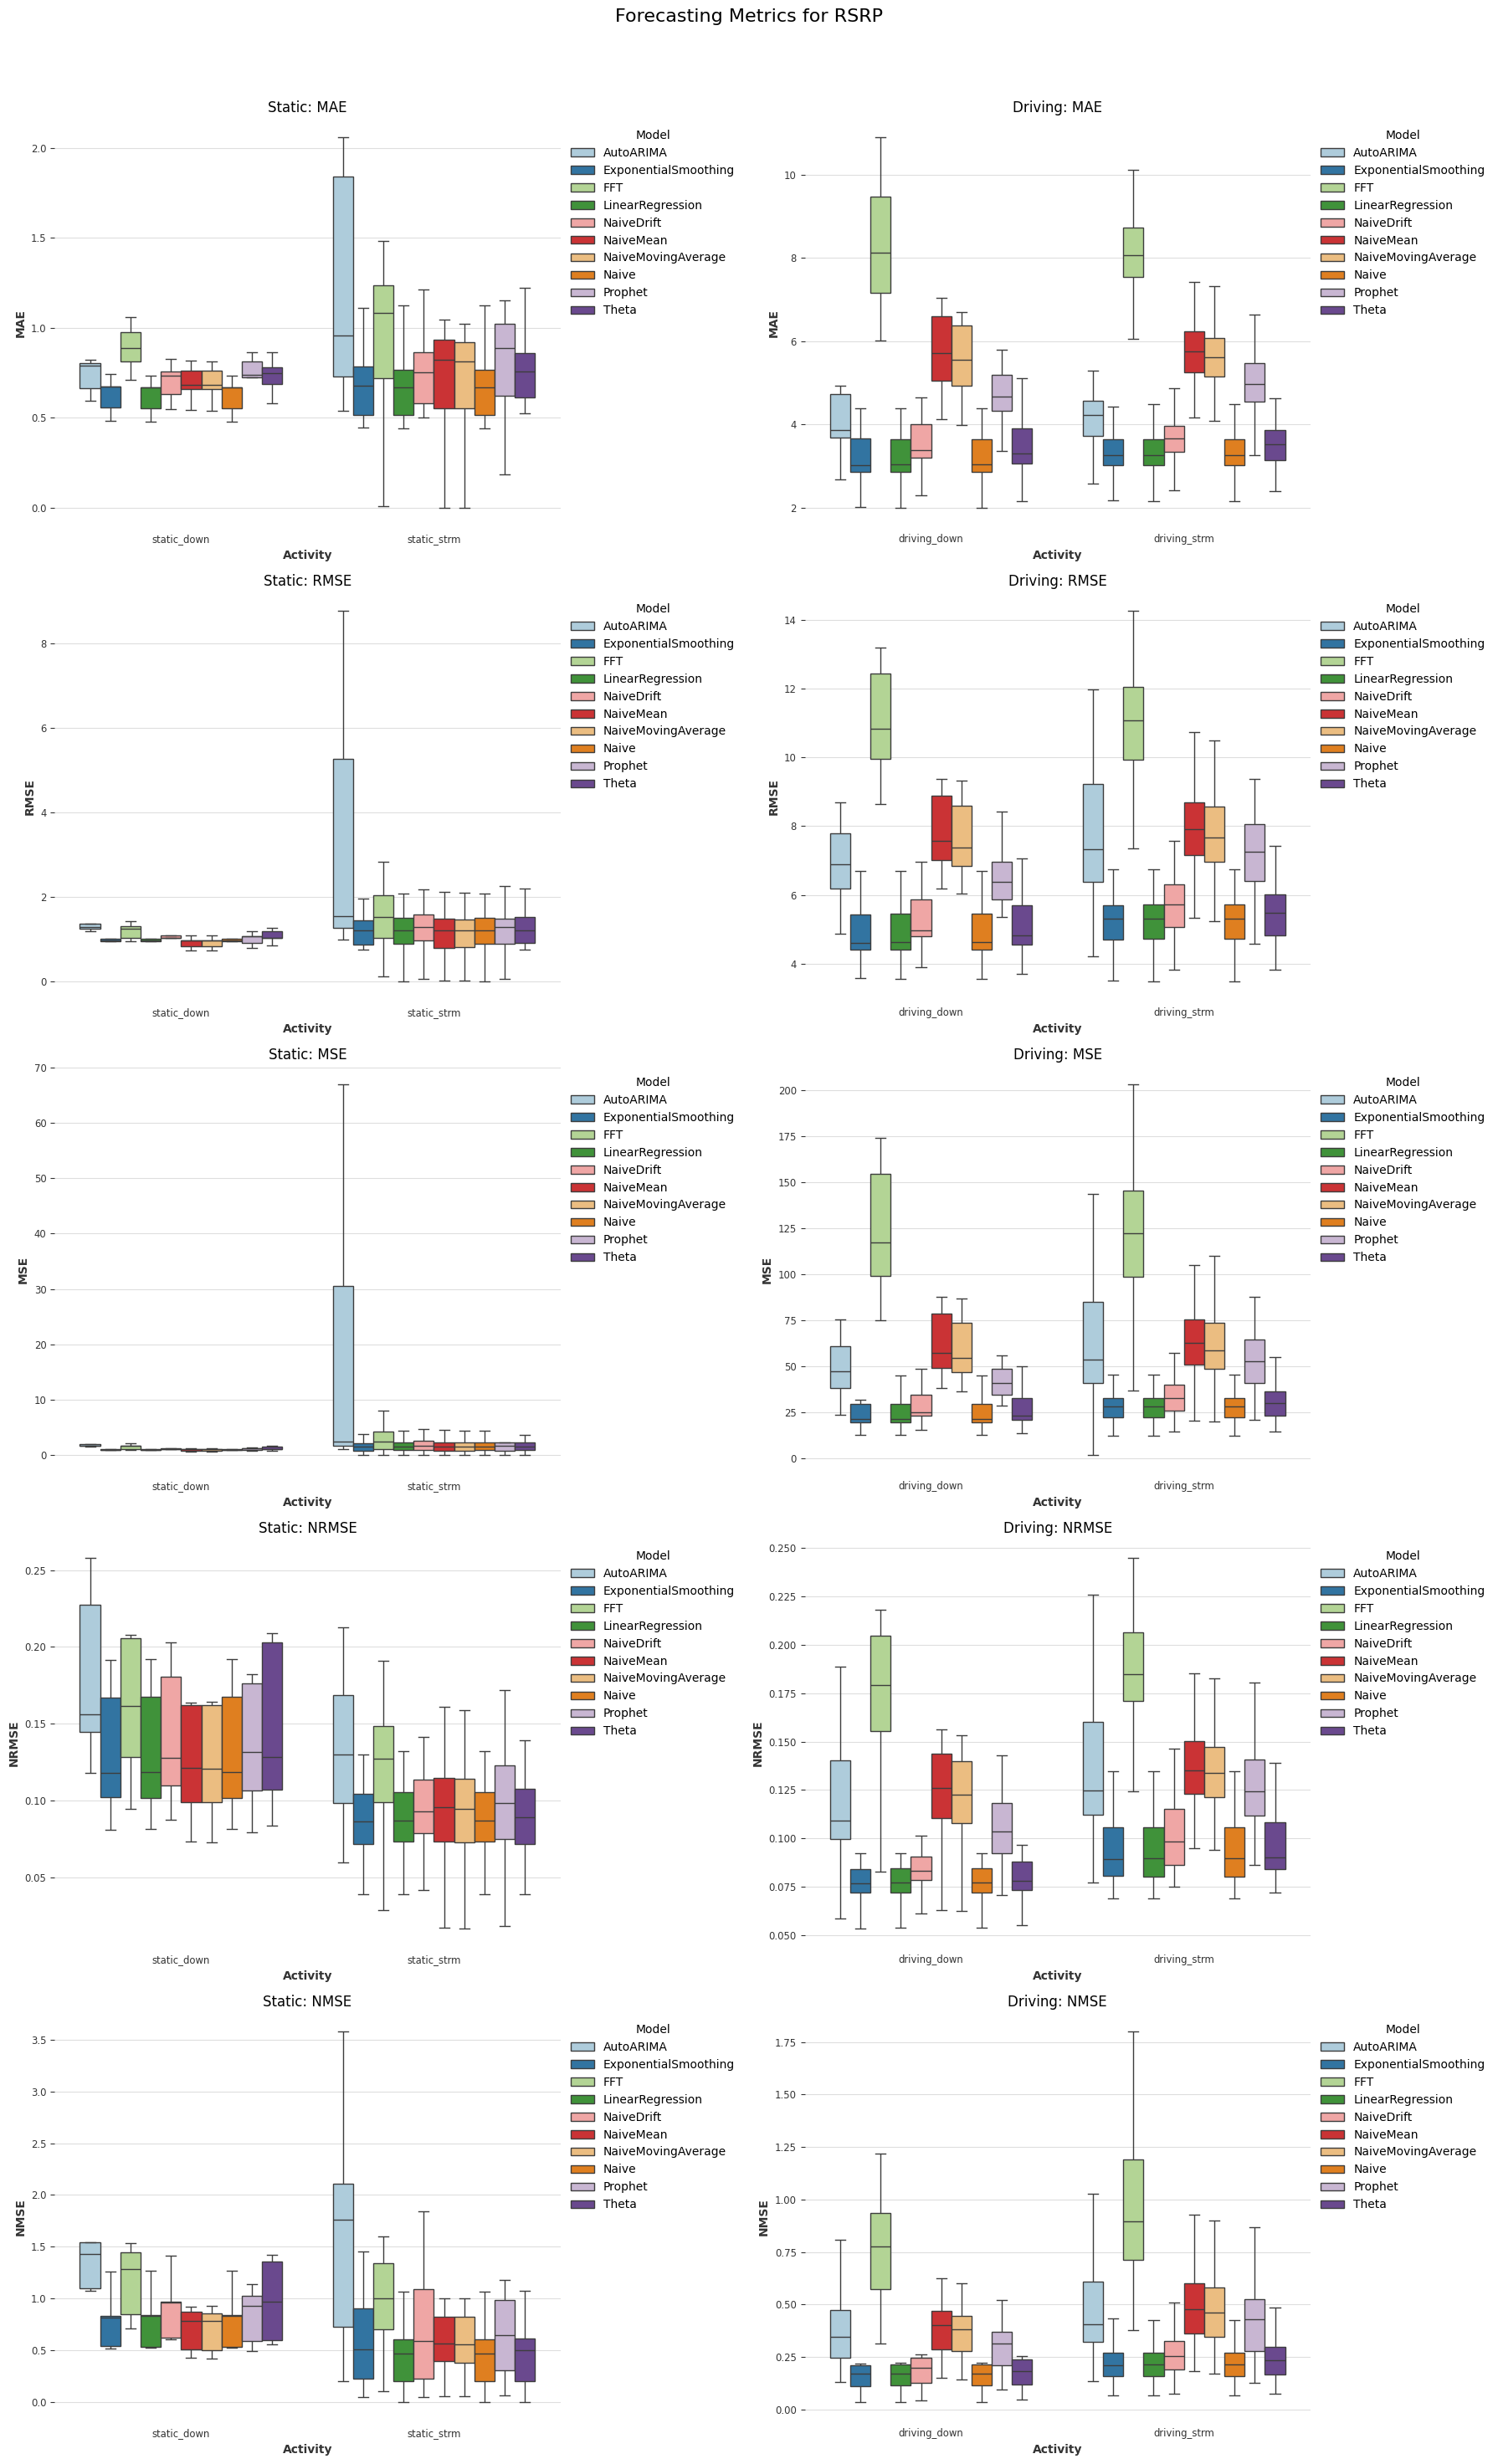

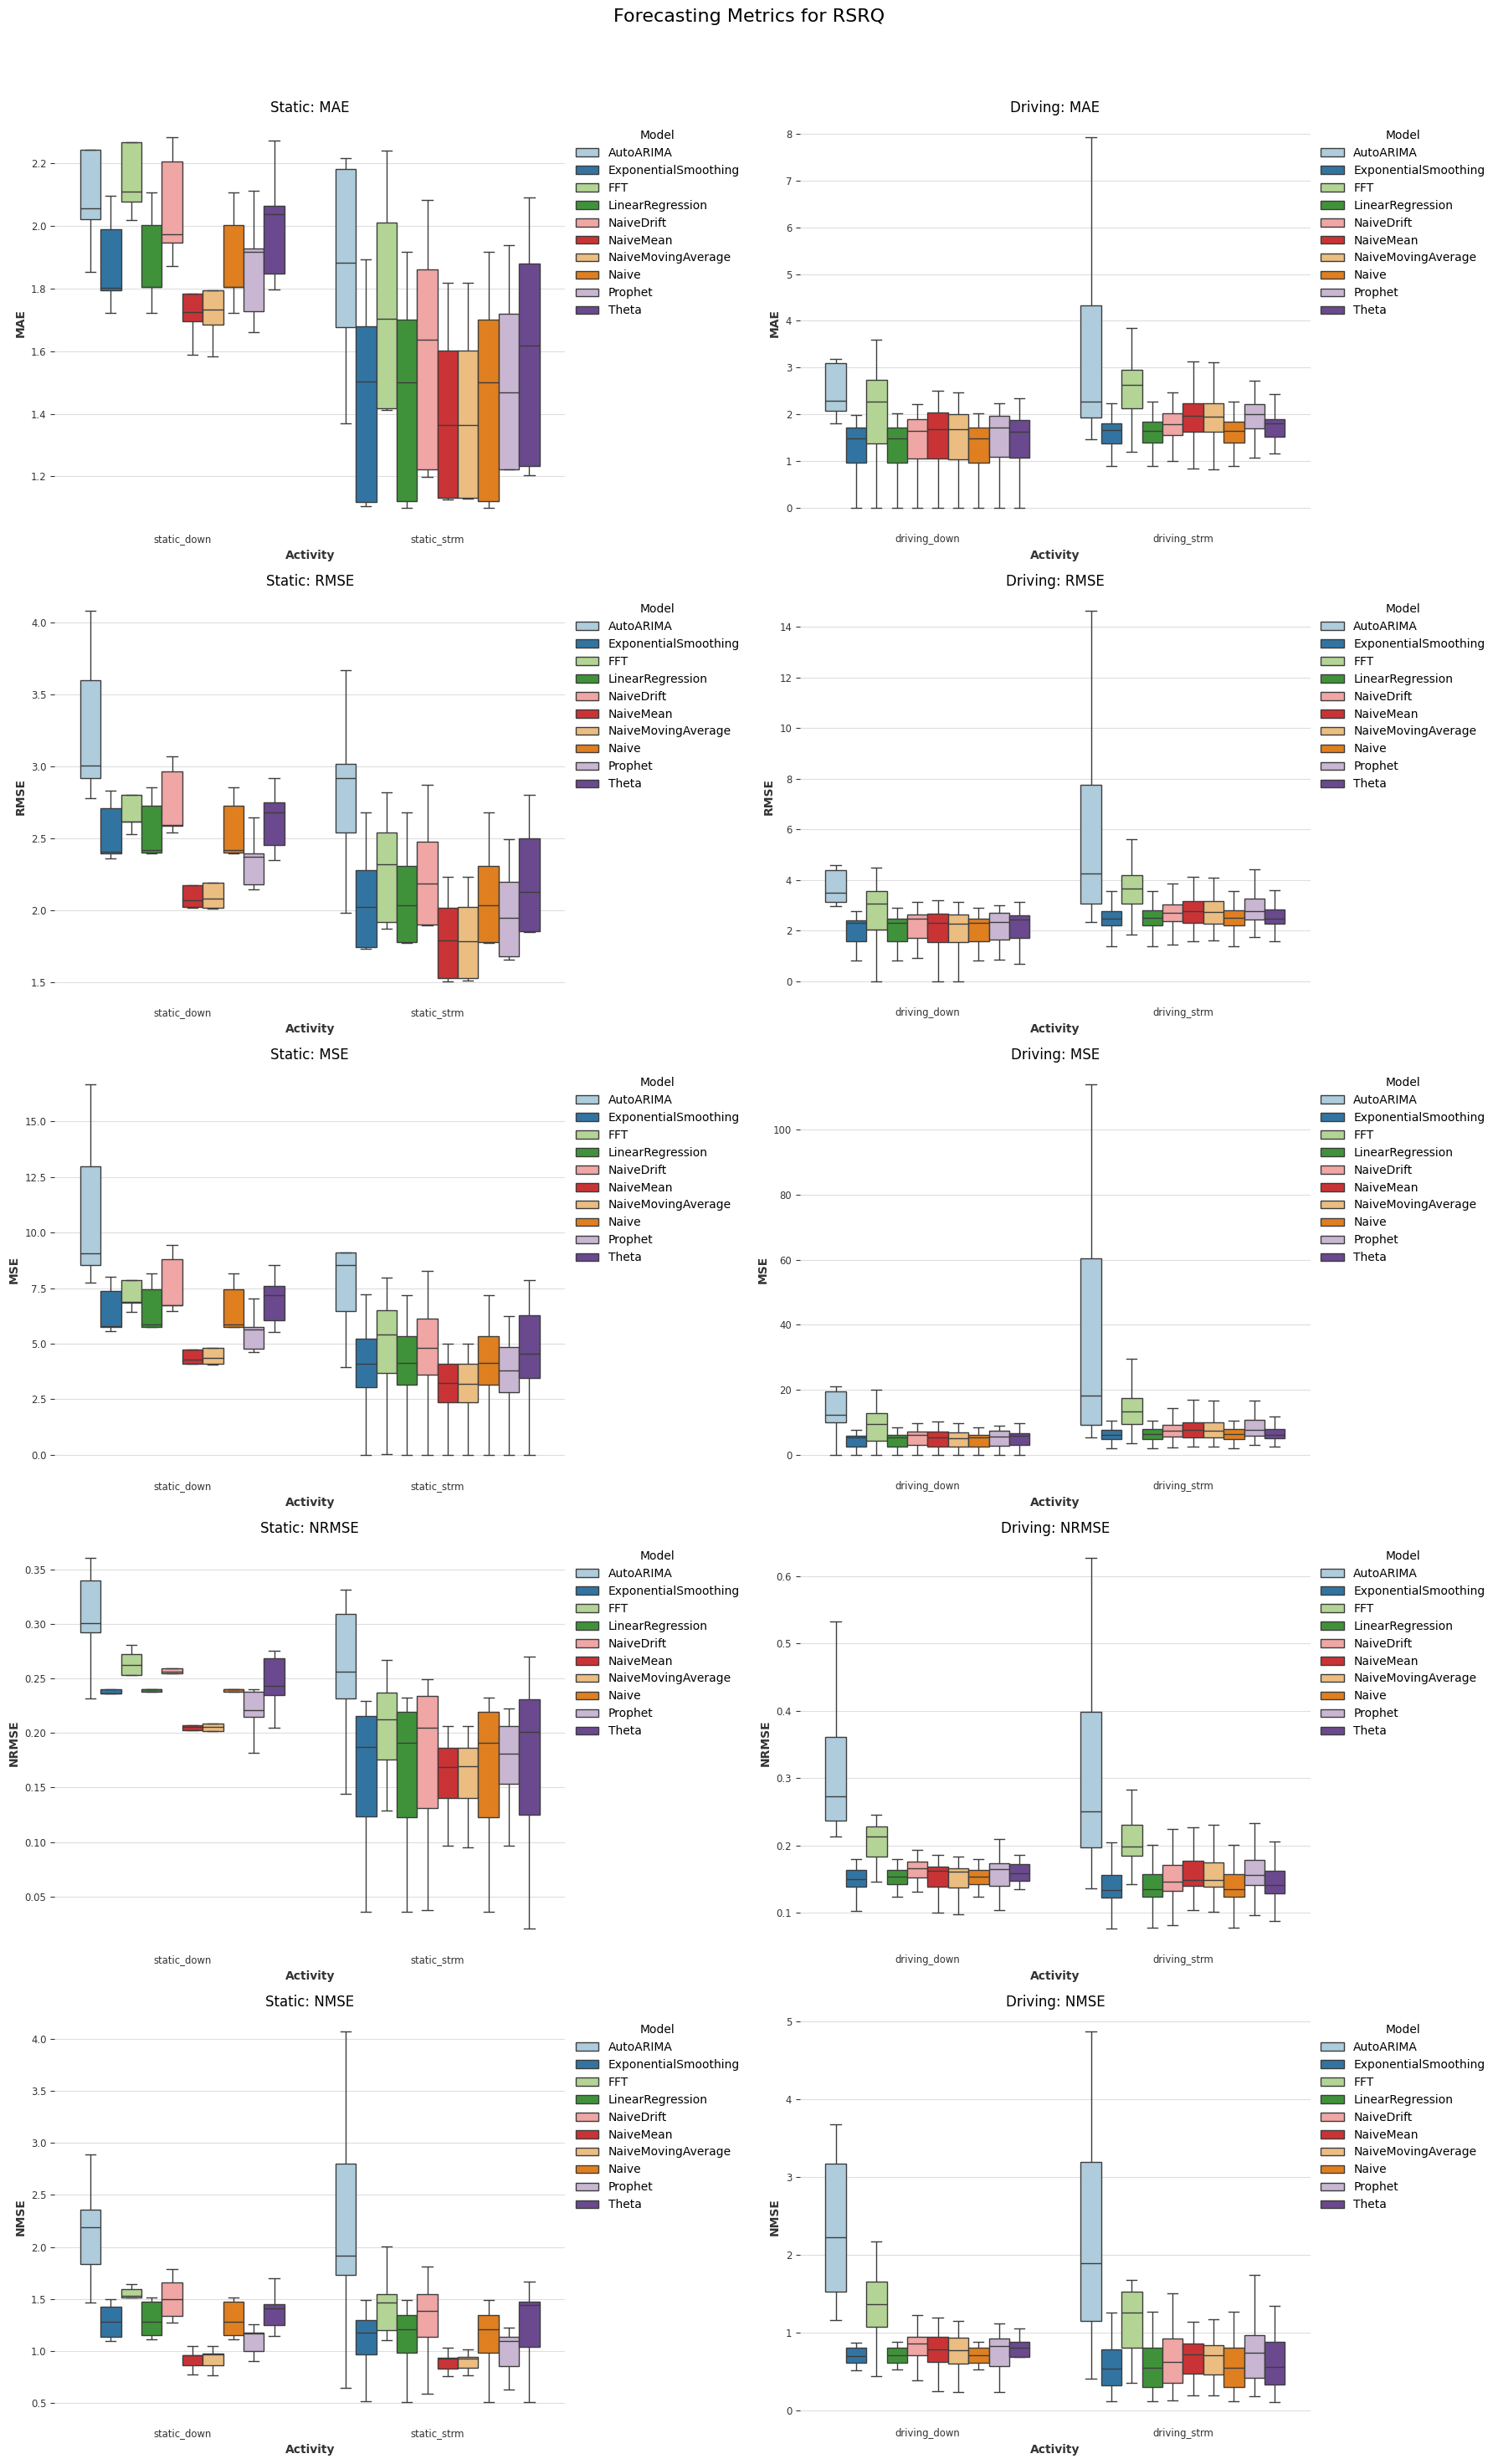

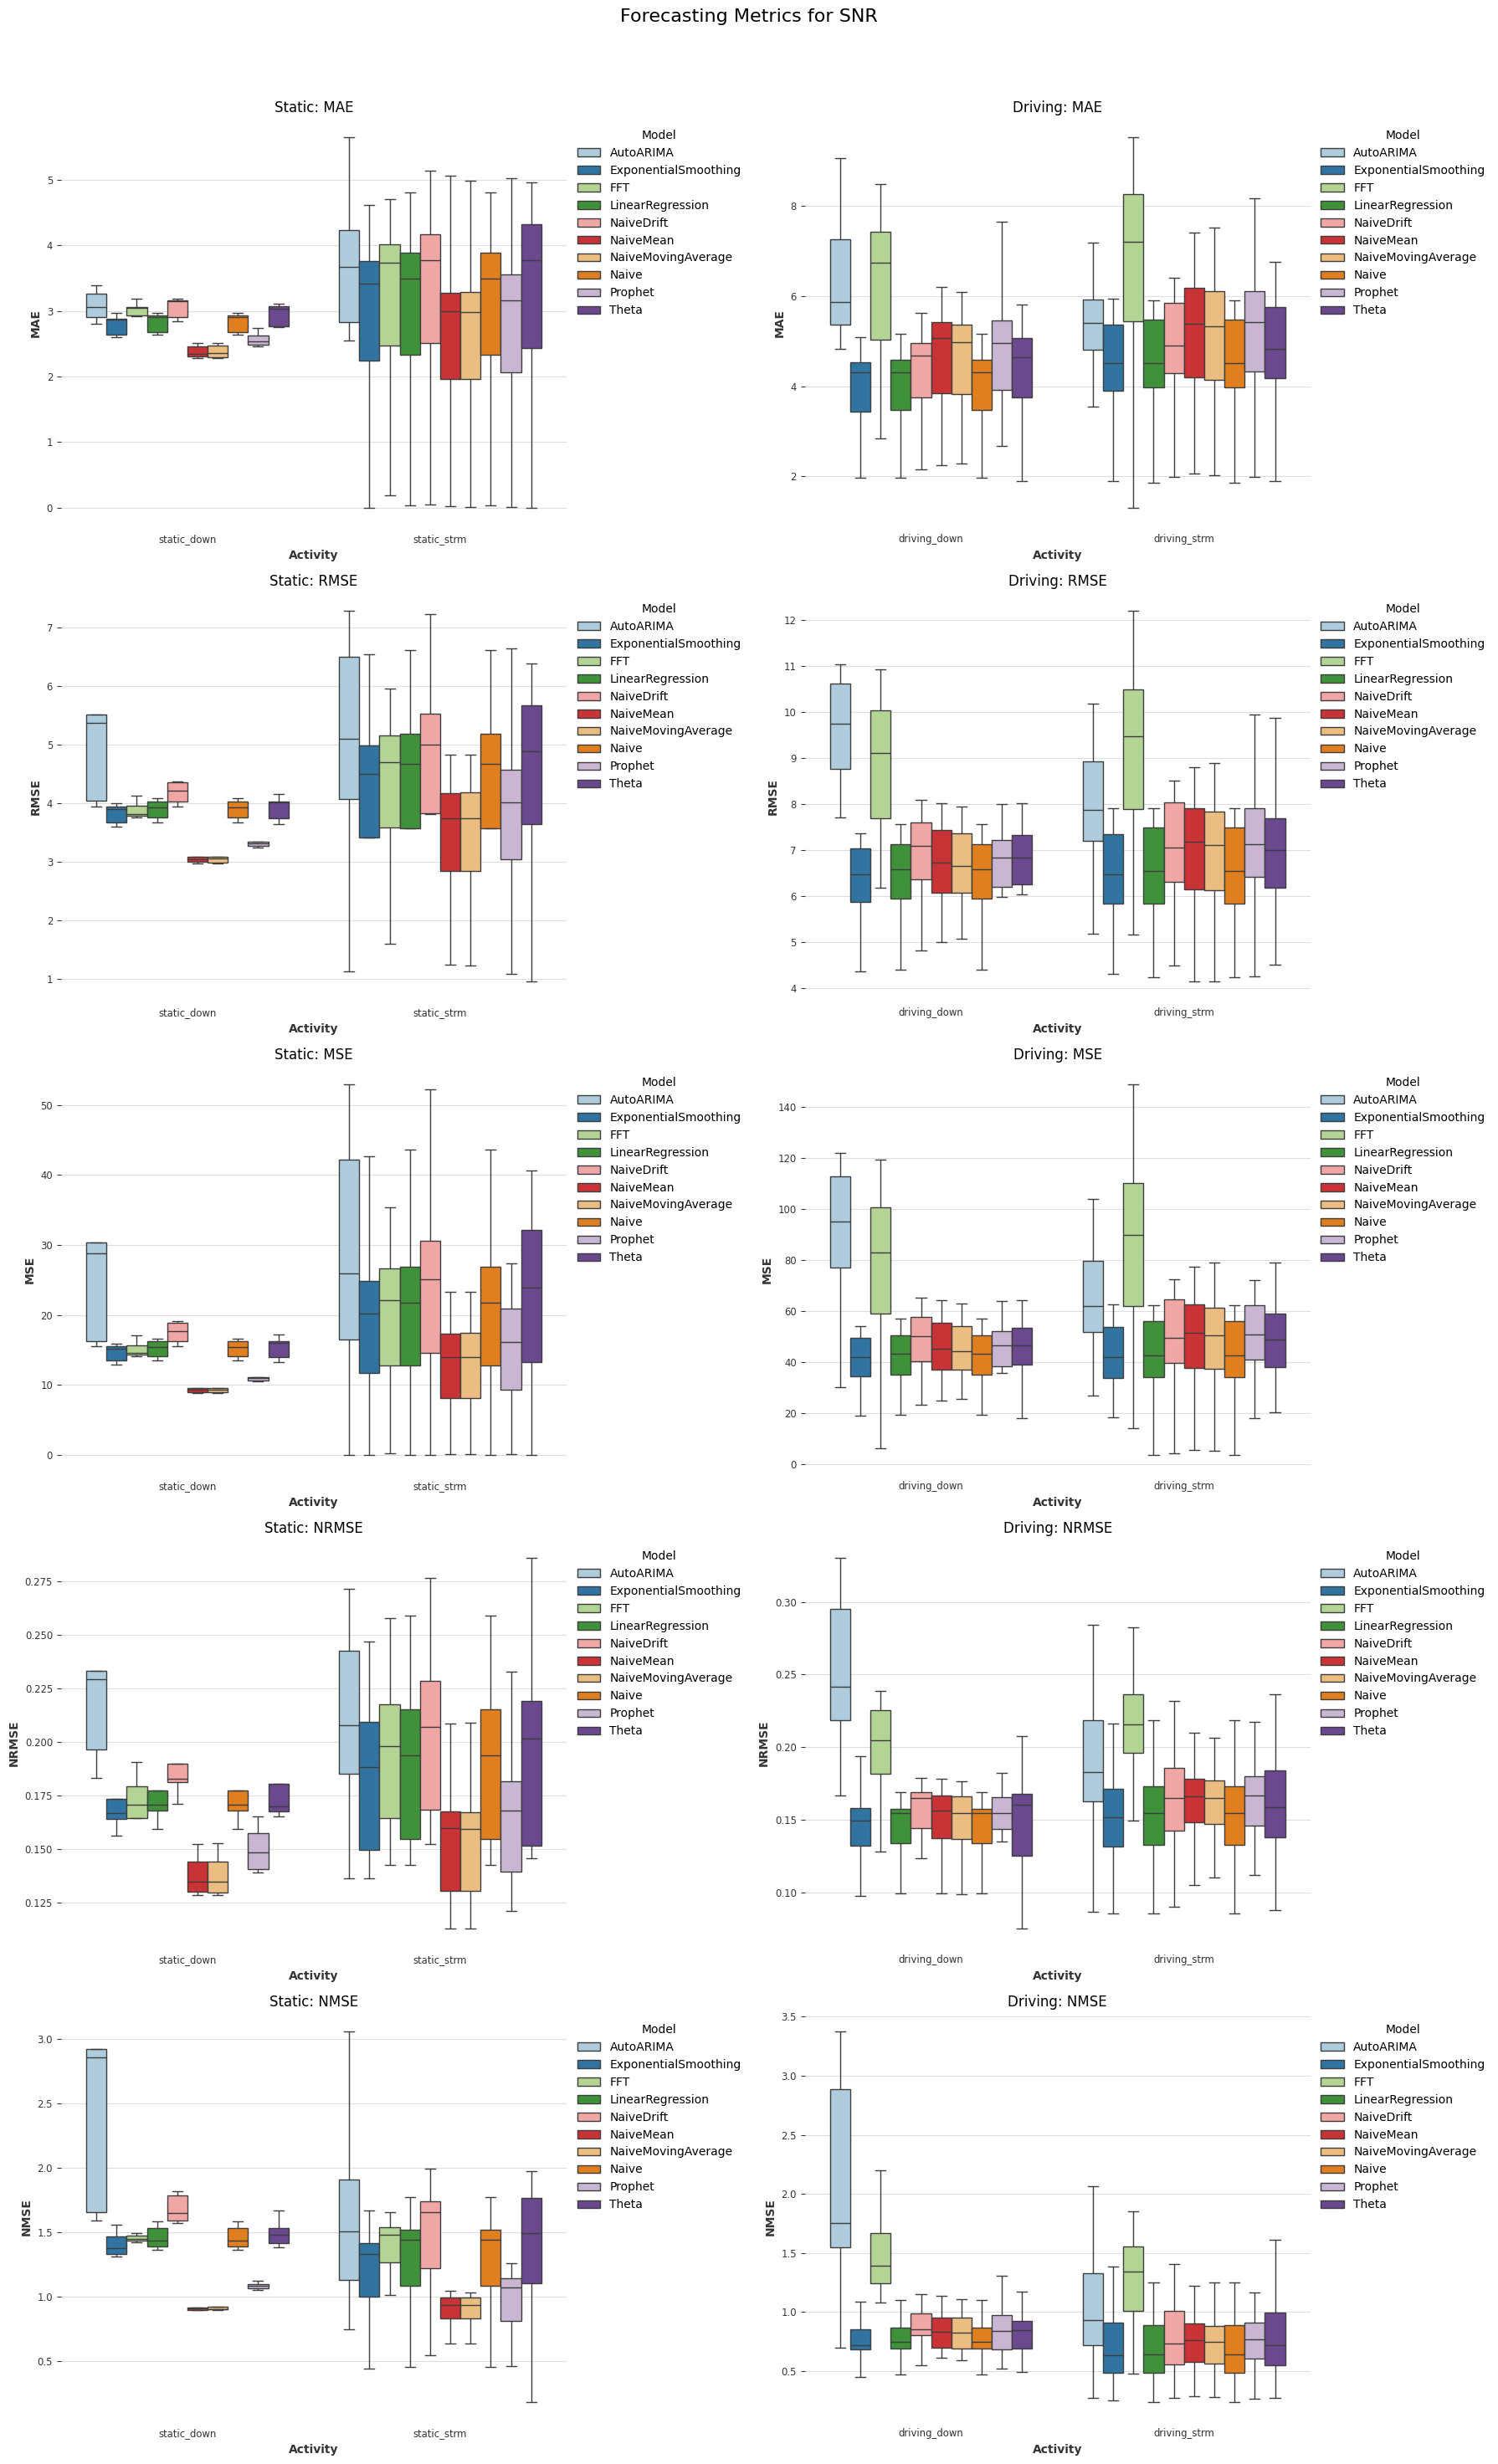

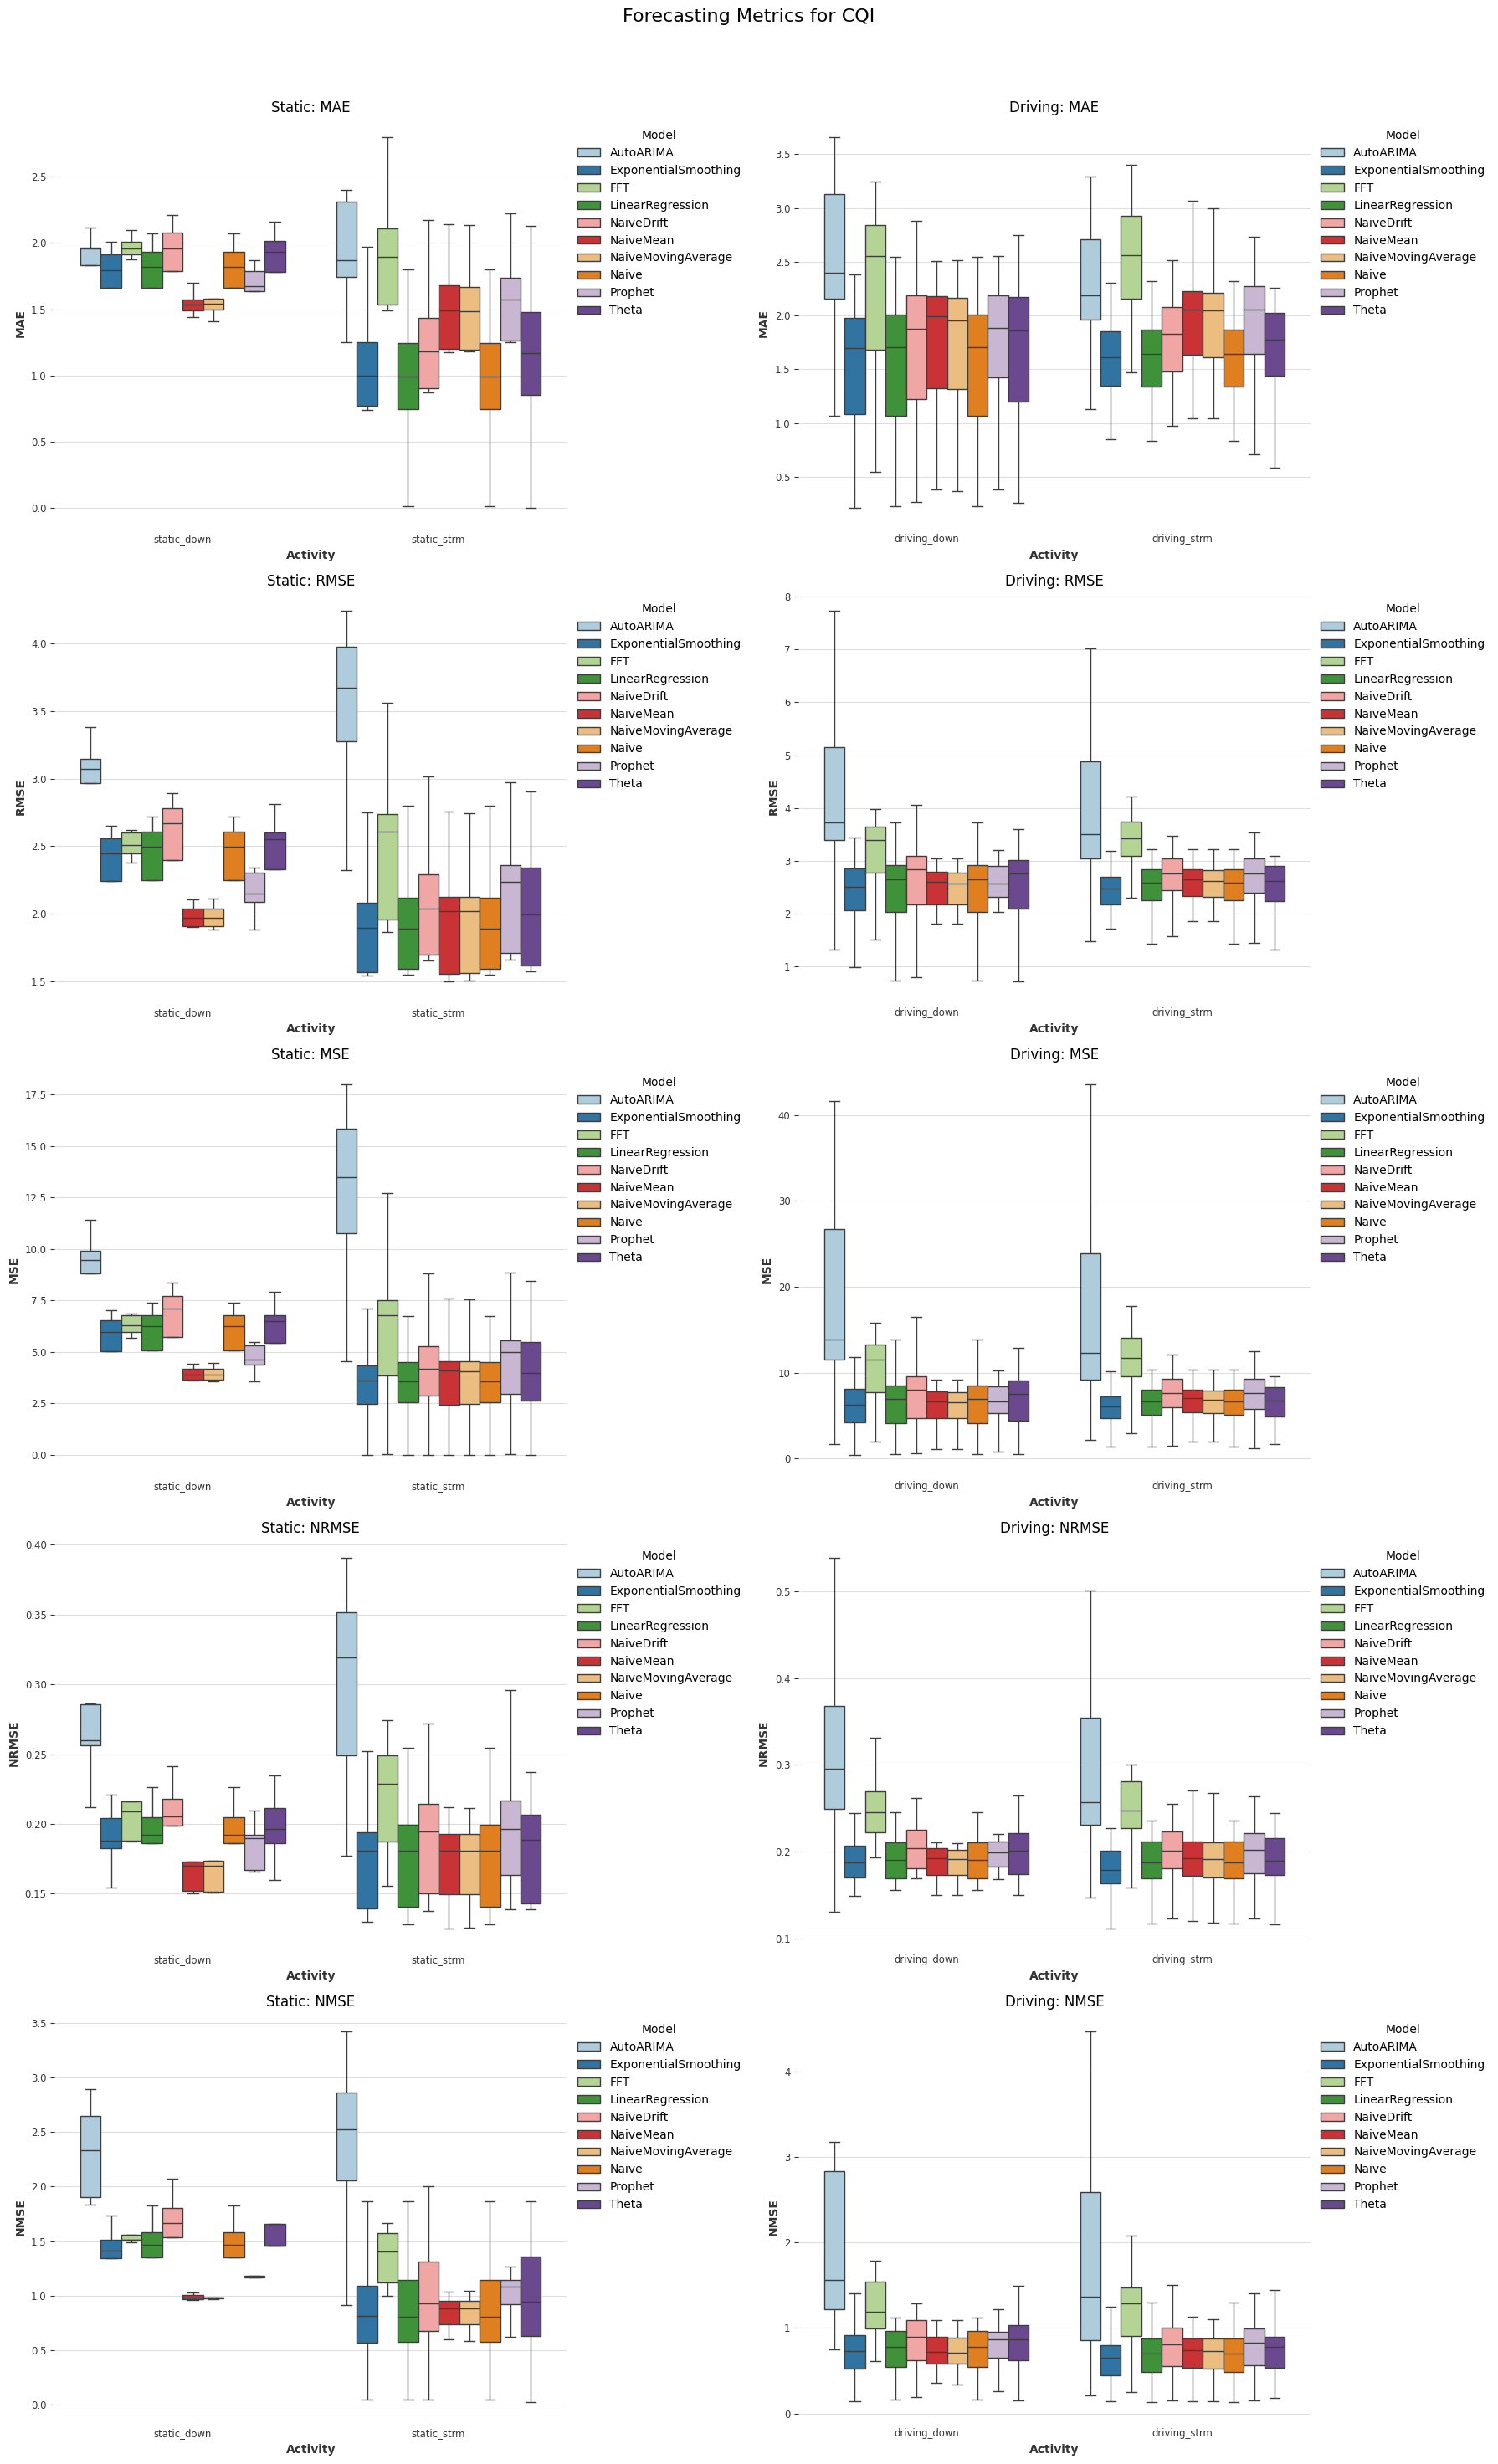

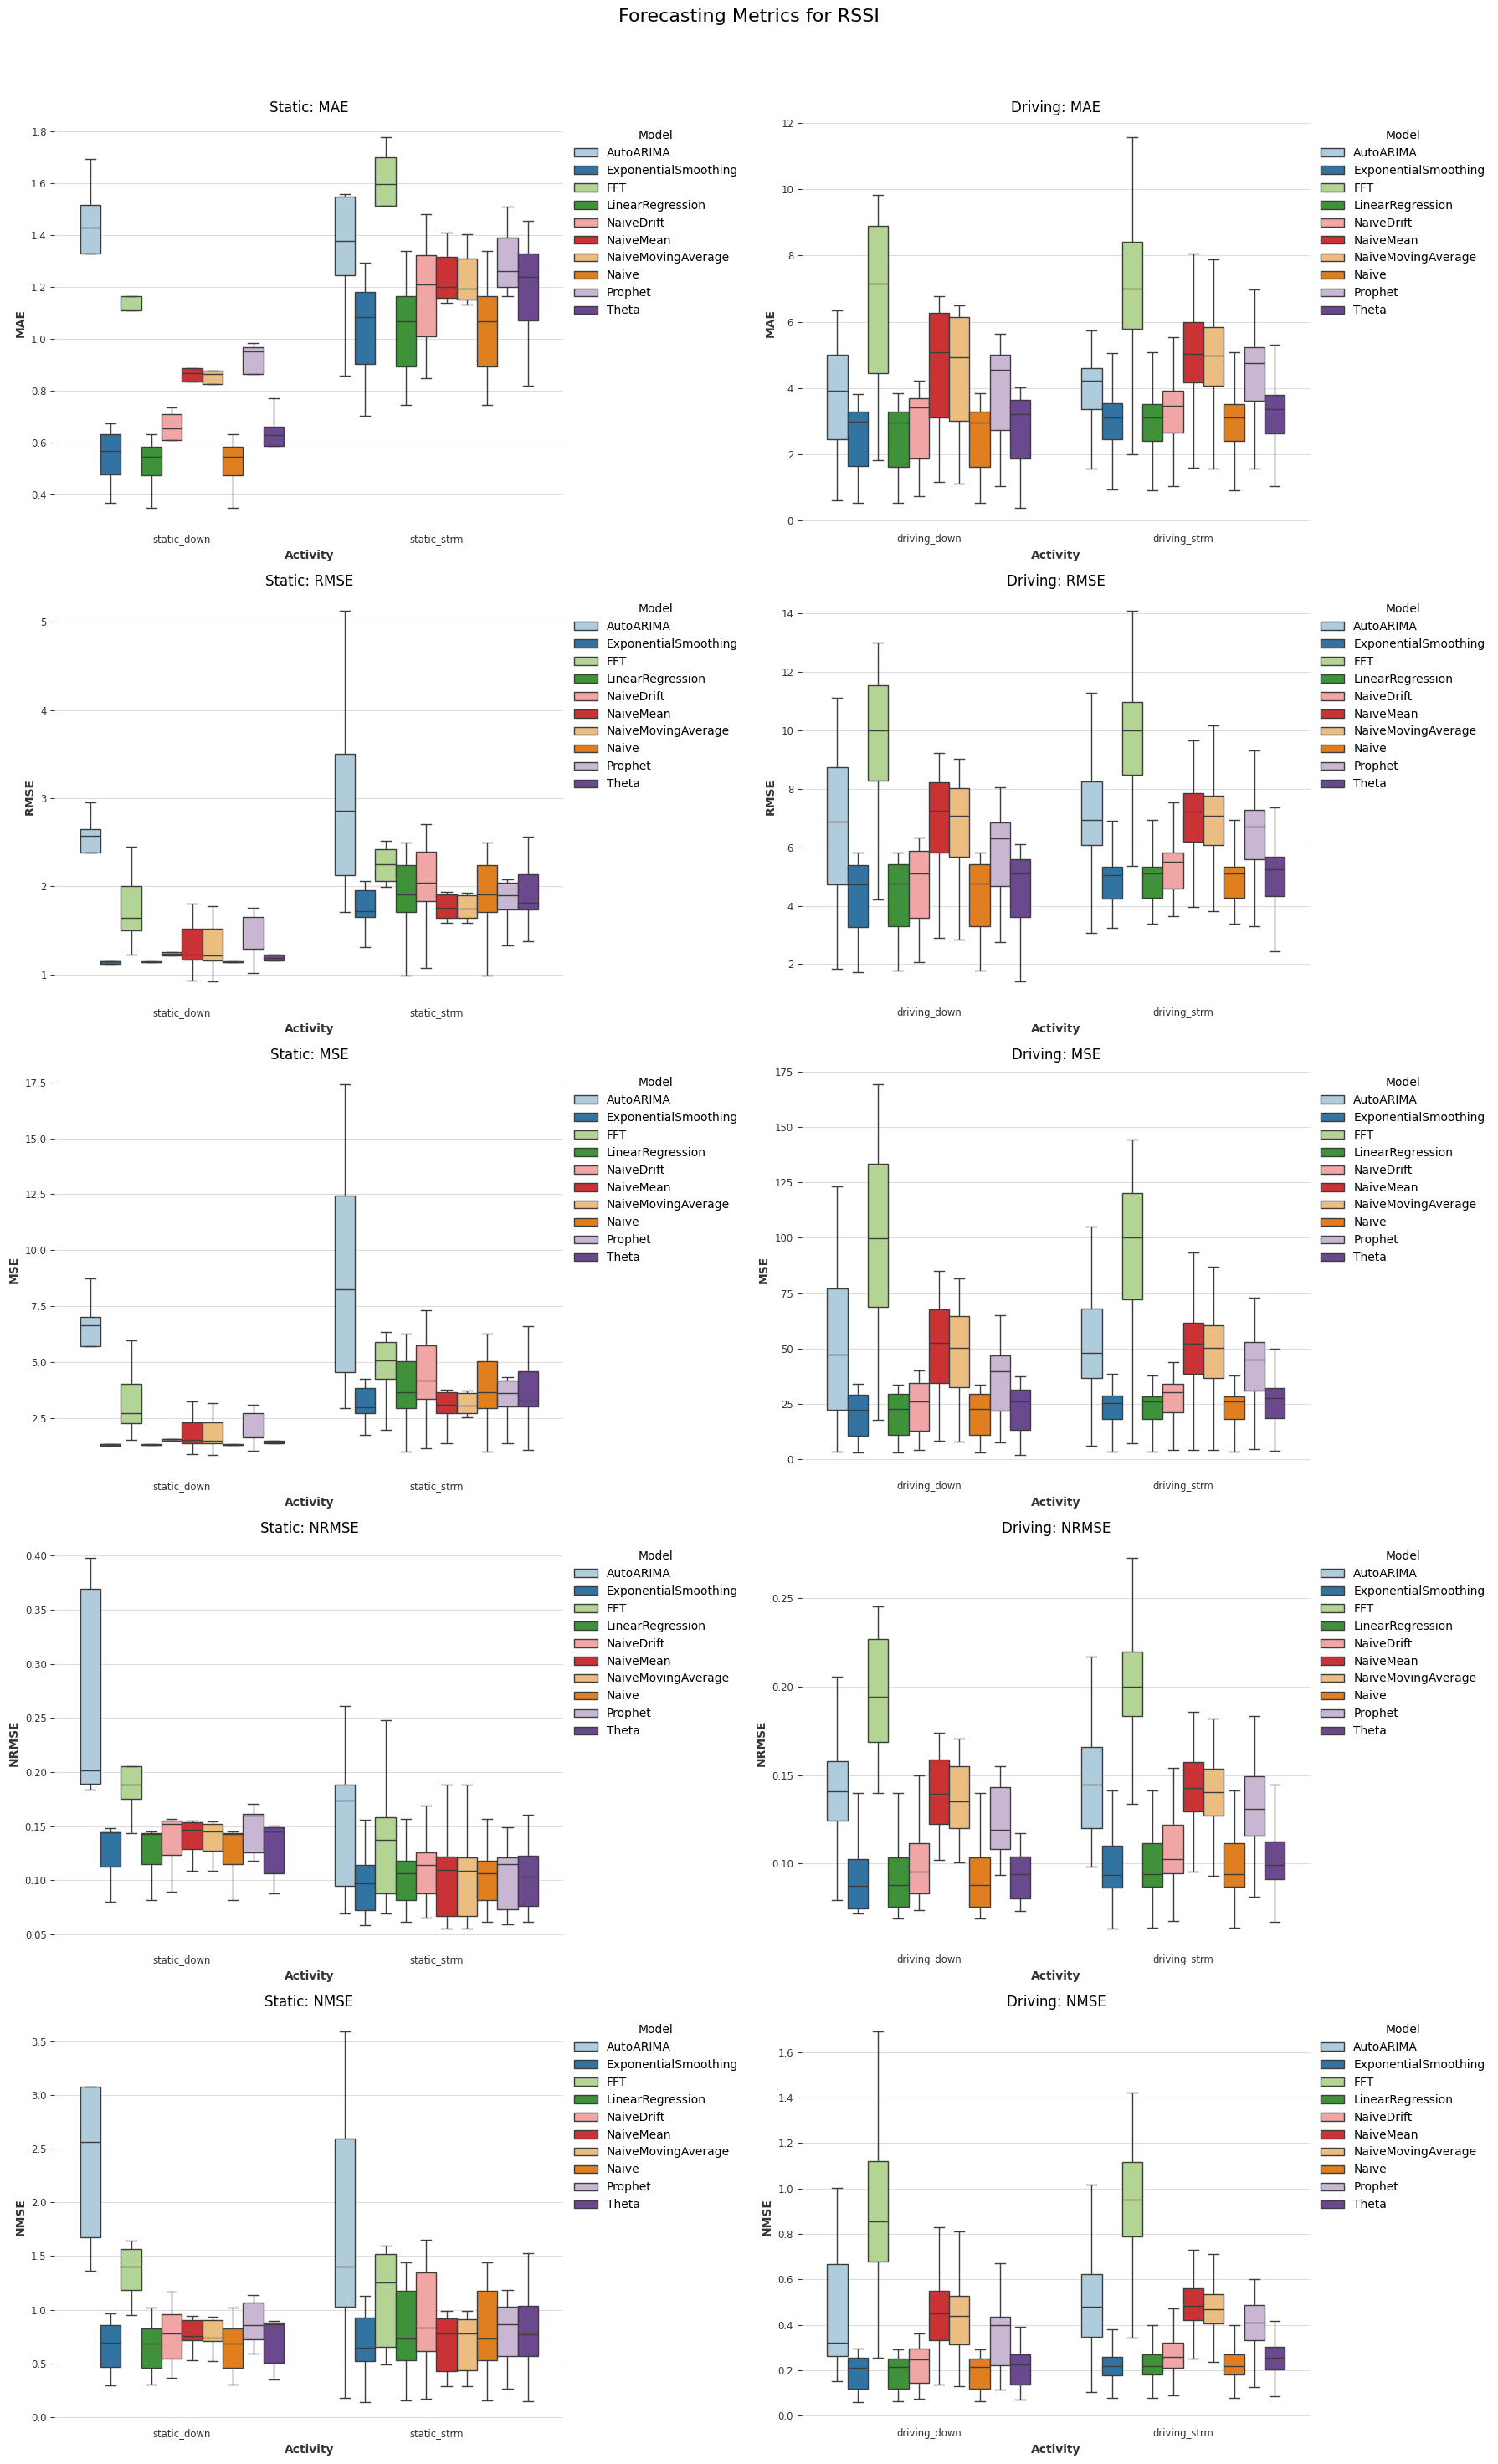

In [15]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

# Lendo os resultados das métricas geradas por um modelo

In [16]:
def query_lowest_metric(df, metric):
    """
    Realiza uma query no DataFrame que retorna as linhas com o menor valor da métrica especificada para cada combinação de Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas 'Model', 'target', 'Activity' e as métricas.
    metric (str): Nome da métrica a ser avaliada ('MAE', 'RMSE' ou 'MSE').

    Retorna:
    pd.DataFrame: DataFrame contendo as linhas com o menor valor da métrica para cada grupo de Model, target e Activity.
    """
    
    # Verificar se a métrica especificada é válida
    if metric not in ['MAE', 'RMSE', 'MSE']:
        raise ValueError(f"Métrica '{metric}' não é válida. Escolha entre 'MAE', 'RMSE' ou 'MSE'.")

    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = ['Model', 'target', 'Activity', metric]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Obter os índices das linhas com o menor valor da métrica para cada combinação de Model, target e Activity
    idx = df.groupby(['Model', 'target', 'Activity'])[metric].idxmin()

    # Retornar as linhas correspondentes ao menor valor da métrica
    result = df.loc[idx]

    return result

In [17]:
lowest_mae = query_lowest_metric(df_metrics, 'MAE')
lowest_rmse = query_lowest_metric(df_metrics, 'RMSE')
lowest_mse = query_lowest_metric(df_metrics, 'MSE')

In [18]:
lowest_mae

Time_Index      Model  \
65    [2020-02-14T12:59:07.000000000, 2020-02-14T12:...  AutoARIMA   
270   [2019-12-02T09:40:25.000000000, 2019-12-02T09:...  AutoARIMA   
315   [2019-12-16T13:40:54.000000000, 2019-12-16T13:...  AutoARIMA   
366   [2019-11-28T09:22:35.000000000, 2019-11-28T09:...  AutoARIMA   
37    [2020-02-13T13:04:14.000000000, 2020-02-13T13:...  AutoARIMA   
...                                                 ...        ...   
4112  [2019-12-23T10:31:25.000000000, 2019-12-23T10:...      Theta   
3785  [2020-02-27T17:31:05.000000000, 2020-02-27T17:...      Theta   
3980  [2019-12-02T09:40:25.000000000, 2019-12-02T09:...      Theta   
4020  [2020-01-16T10:44:24.000000000, 2020-01-16T10:...      Theta   
4045  [2020-01-06T09:56:24.000000000, 2020-01-06T09:...      Theta   

                                                Actuals  \
65    [14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 14.0, 14....   
270   [8.0, 8.0, 8.0, 8.0, 8.0, 13.999999999999998, ...   
315   [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   
366   [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   
37    [-99.0, -93.0, -93.0, -92.0, -92.0, -92.0, -90...   
...                                                 ...   
4112  [-85.0, -85.0, -85.5, -85.99999999999999, -86....   
3785  [-2.0, -2.0, 0.0, 0.0, -1.0, -1.0, -1.0, 1.0, ...   
3980  [7.0, 7.0, 10.0, 10.0, 9.0, 9.0, 5.0, 5.0, 5.0...   
4020  [-0.9999999999999993, -0.9999999999999993, -0....   
4045  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....   

                                                  Preds  ElapsedTime target  \
65    [14.075388311546599, 13.661517967601764, 13.66...    20.652354    CQI   
270   [6.347234695332148, 3.717407522453008, 1.04052...    16.630062    CQI   
315   [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   132.629273    CQI   
366   [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   238.378127    CQI   
37    [-99.41720703139154, -99.52900129075675, -99.5...   176.826534   RSRP   
...                                                 ...          ...    ...   
4112  [-85.3750292370542, -85.3750292370542, -85.375...     8.600890   RSSI   
3785  [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....     0.771755    SNR   
3980  [7.500000007450581, 7.500000007450581, 7.50000...     0.932346    SNR   
4020  [0.5319570296101408, 0.7834068409076166, -2.07...     5.285993    SNR   
4045  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....     3.300214    SNR   

          Activity       MAE      RMSE        MSE     NRMSE      NMSE  
65    driving_down  1.068171  1.309548   1.714916  0.130955  0.747538  
270   driving_strm  0.581342  2.510187   6.301040  0.209182  1.266539  
315    static_down  1.539037  2.577102   6.641456  0.286345  1.832134  
366    static_strm  1.253523  2.323637   5.399290  0.211240  0.966396  
37    driving_down  2.673824  7.702151  59.323137  0.122256  0.347149  
...            ...       ...       ...        ...       ...       ...  
4112   static_strm  0.559861  1.033788   1.068719  0.103379  0.256333  
3785  driving_down  0.371456  1.205527   1.453296  0.075345  0.716014  
3980  driving_strm  0.541031  2.025322   4.101929  0.088057  0.272826  
4020   static_down  2.757058  3.638770  13.240645  0.165399  1.384144  
4045   static_strm  0.000000  0.000000   0.000000       NaN       NaN  

[200 rows x 12 columns]

## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [19]:
def plot_actual_vs_preds(result_df: pd.DataFrame, model: str, target: str, activity: str) -> None:
    """
    Plota as séries temporais reais versus as predições para uma combinação específica de Model, target e Activity.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals", "Preds", "Model", "target", "Activity".
        model (str): O modelo a ser filtrado.
        target (str): O alvo a ser filtrado.
        activity (str): A atividade a ser filtrada.
    """
    # Filtra o DataFrame com base nos parâmetros fornecidos
    filtered_df = result_df[(result_df["Model"] == model) & 
                             (result_df["target"] == target) & 
                             (result_df["Activity"] == activity)]
    print(filtered_df[["MAE", "RMSE", "MSE"]])

    # Verifica se a filtragem resultou em algum dado
    if filtered_df.empty:
        raise ValueError("Nenhum dado encontrado para os parâmetros fornecidos.")

    # Obtém os dados da primeira linha do DataFrame filtrado
    time_index = pd.DatetimeIndex(filtered_df["Time_Index"].iloc[0])
    actuals = filtered_df["Actuals"].iloc[0]
    preds = filtered_df["Preds"].iloc[0]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(label="Predições", color="red", linestyle='--')  # Linha tracejada para predições

    # Adiciona título, legendas e labels
    plt.title(f"Comparação entre Reais e Predições - Model: {model}, Target: {target}, Activity: {activity}")
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

          MAE      RMSE       MSE
317  0.594476  1.182585  1.398508


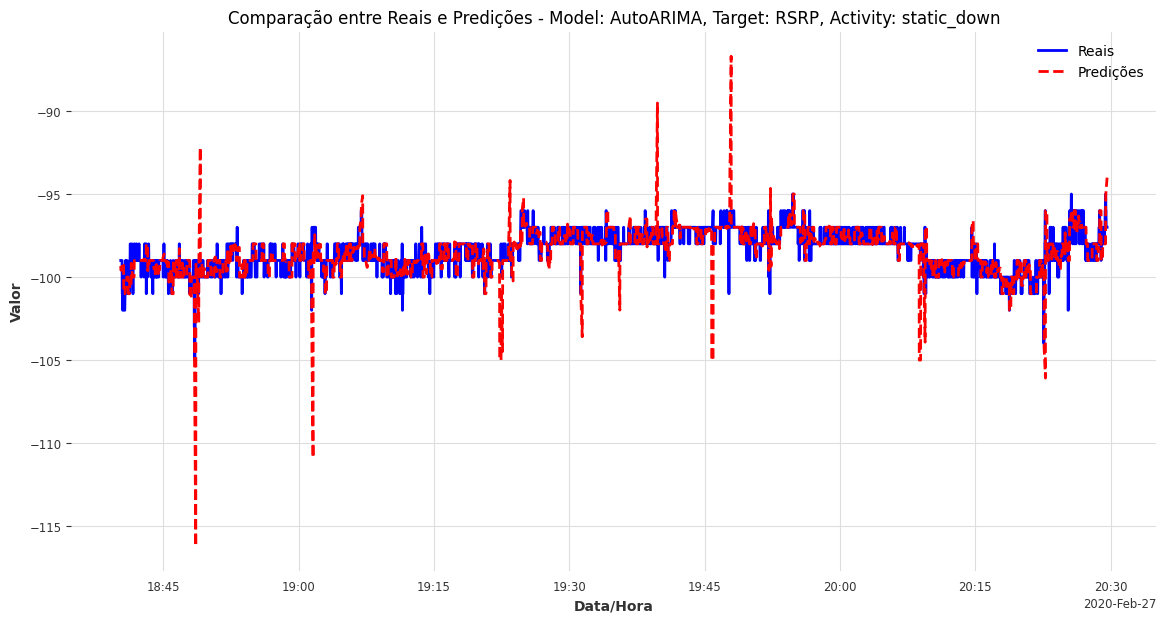

          MAE      RMSE       MSE
726  0.484425  0.809022  0.654517


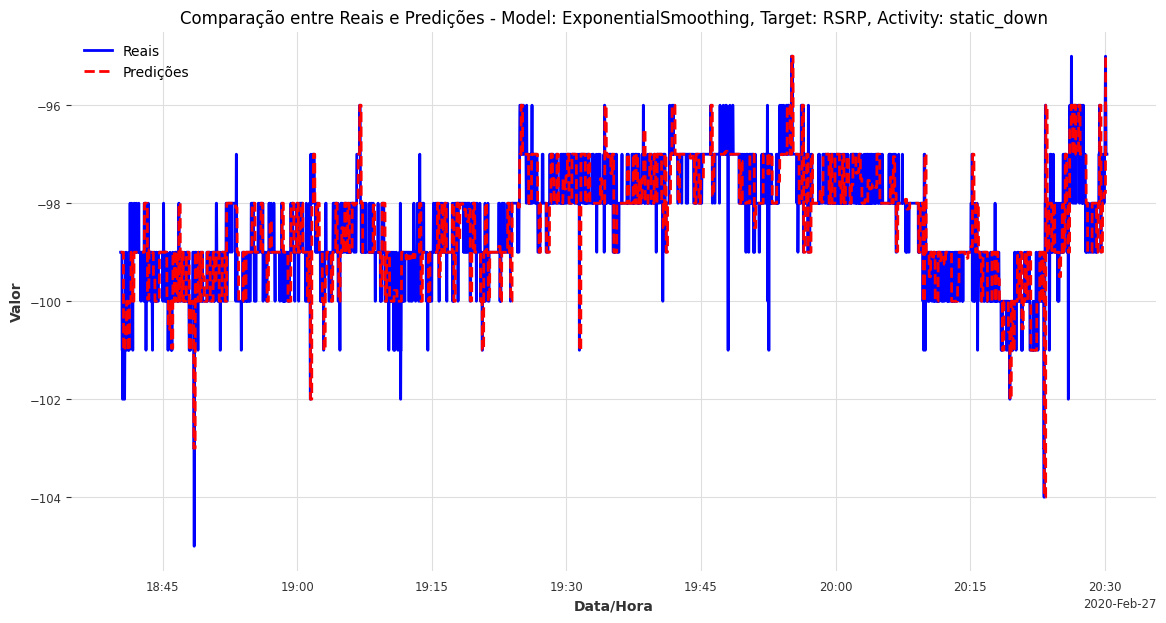

           MAE      RMSE       MSE
1141  0.708379  0.948465  0.899586


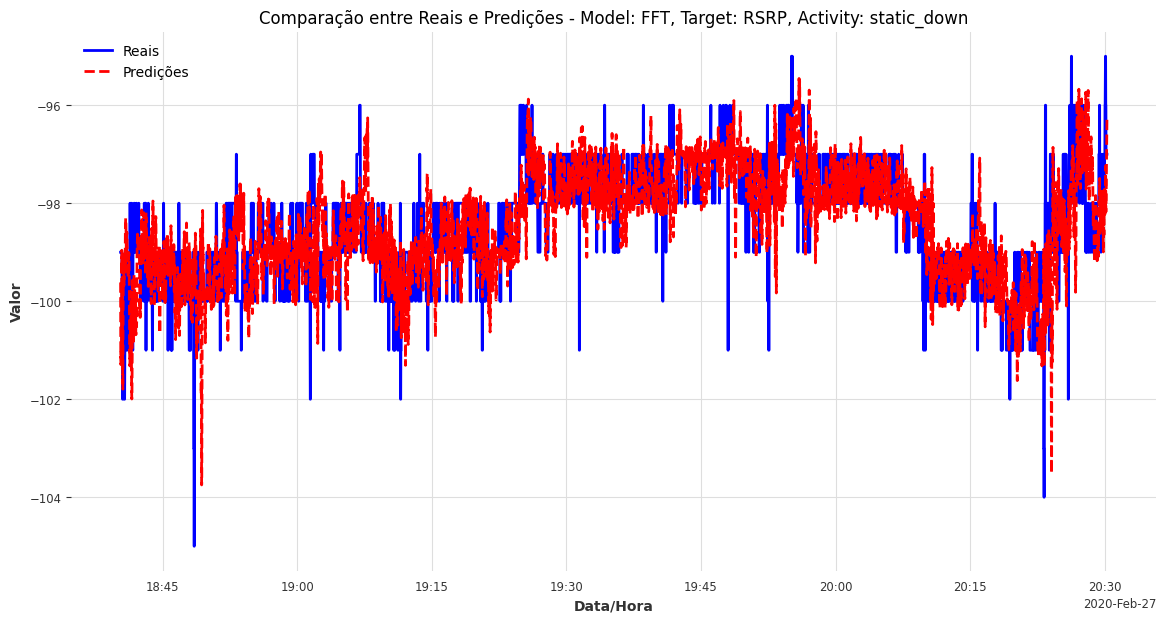

           MAE      RMSE      MSE
1553  0.480303  0.813517  0.66181


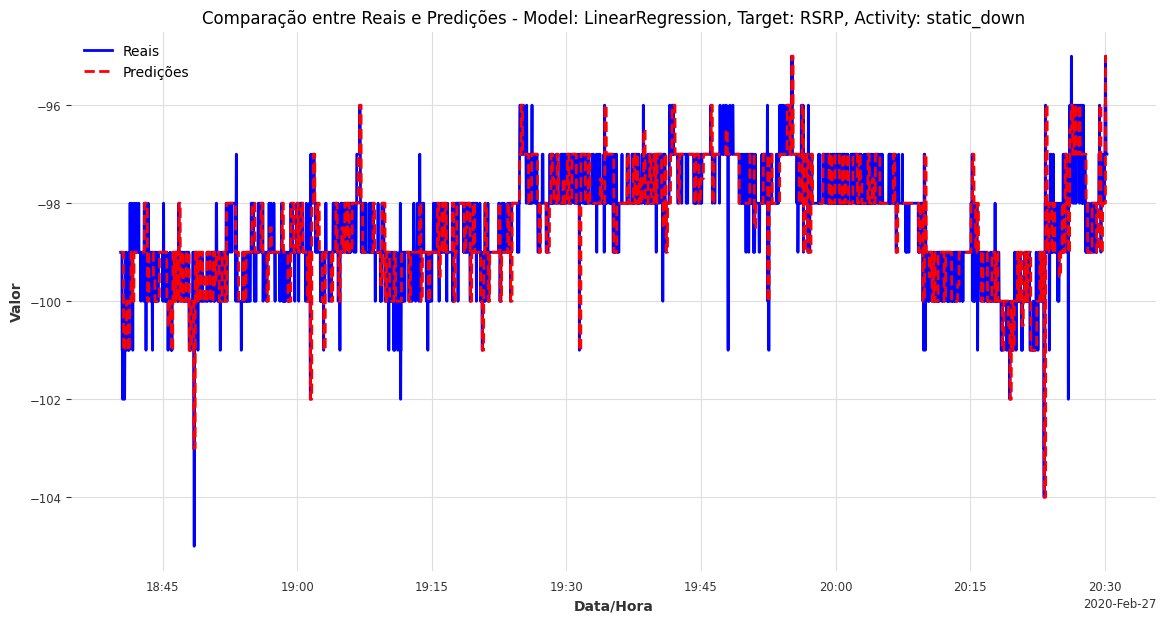

           MAE      RMSE      MSE
3207  0.480303  0.813517  0.66181


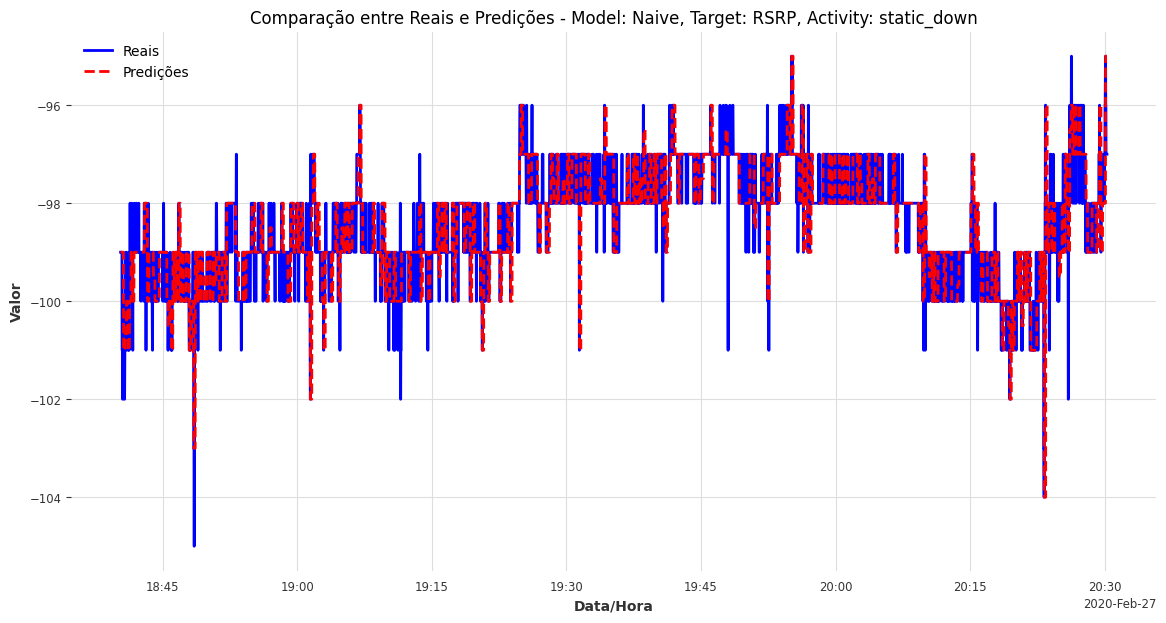

          MAE      RMSE       MSE
1962  0.54762  0.877425  0.769875


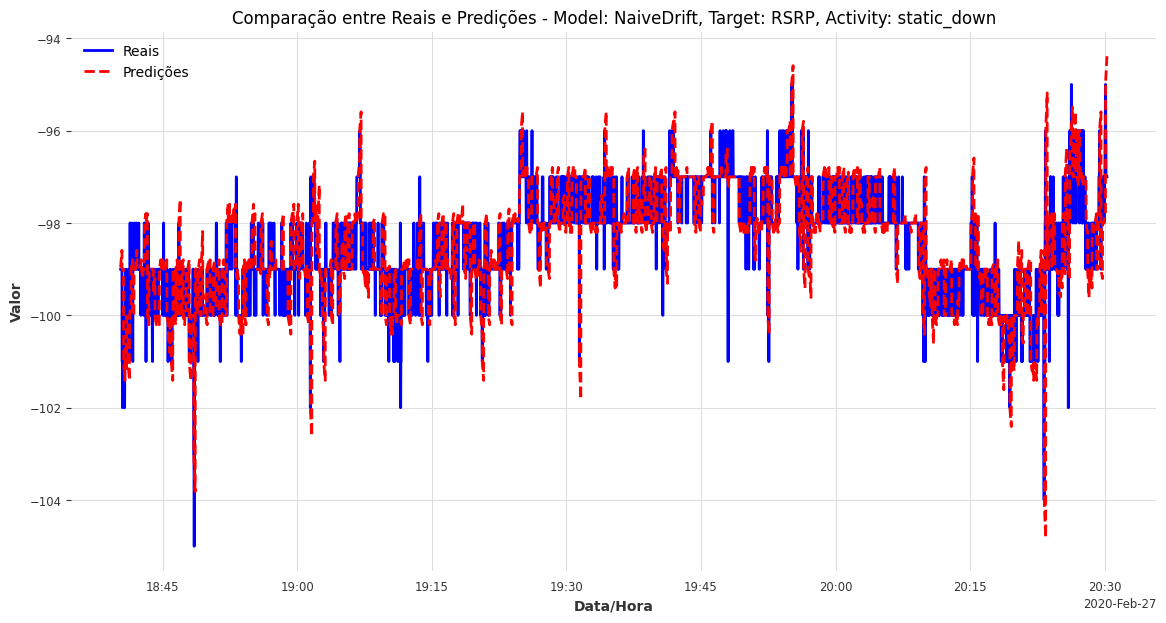

           MAE      RMSE       MSE
2377  0.543507  0.733154  0.537515


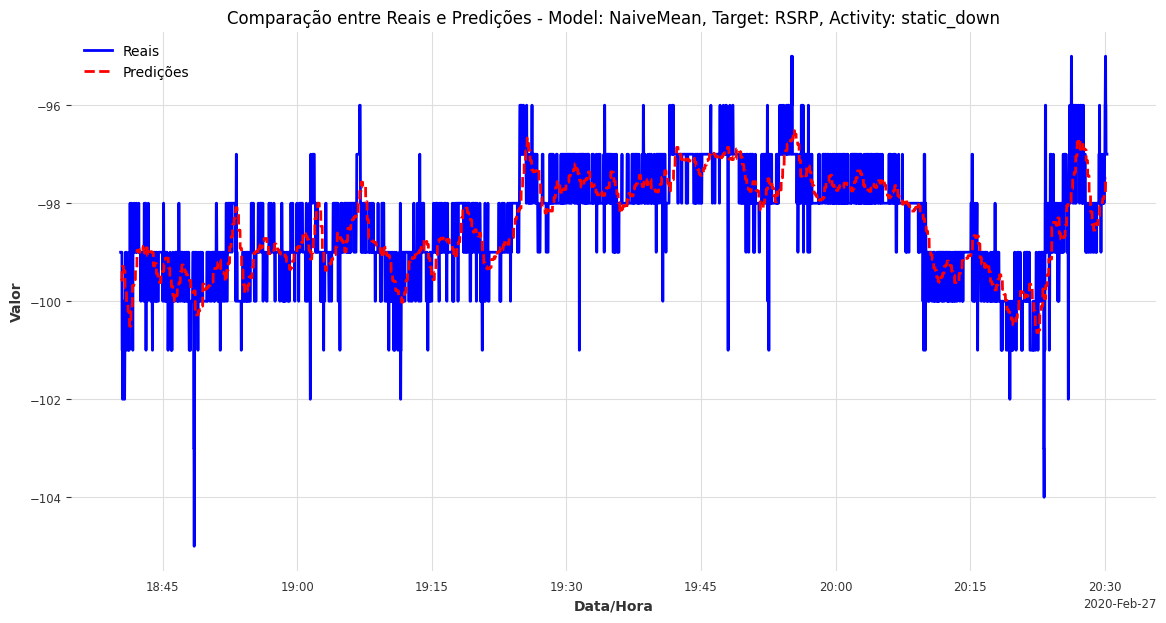

           MAE      RMSE       MSE
2792  0.539609  0.730292  0.533327


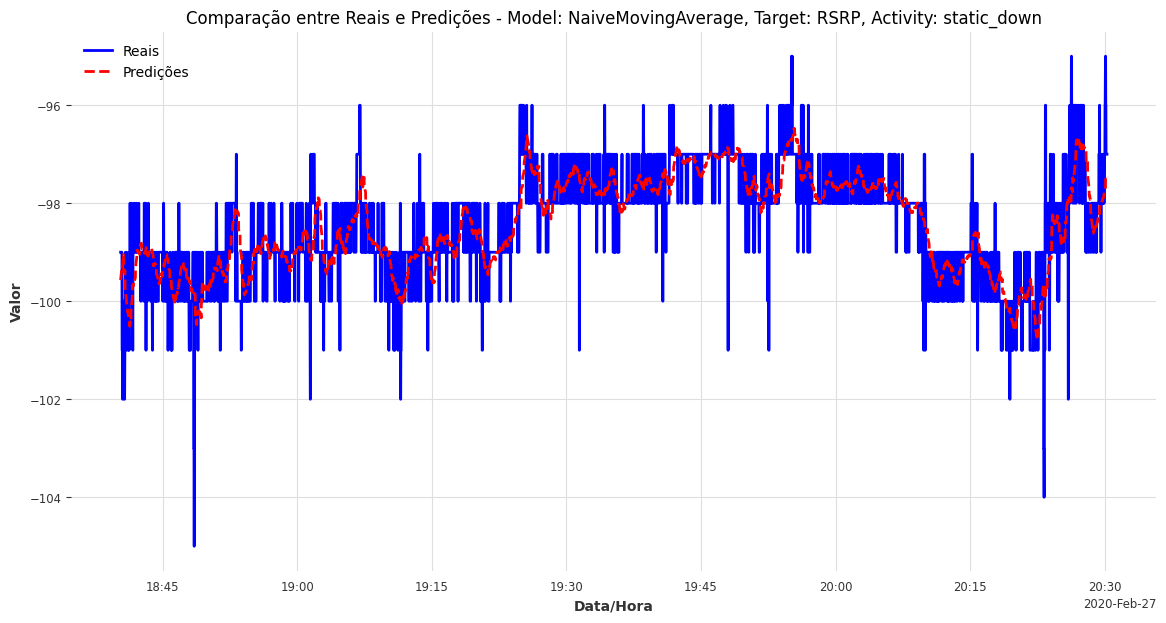

           MAE      RMSE       MSE
3619  0.570166  0.791823  0.626983


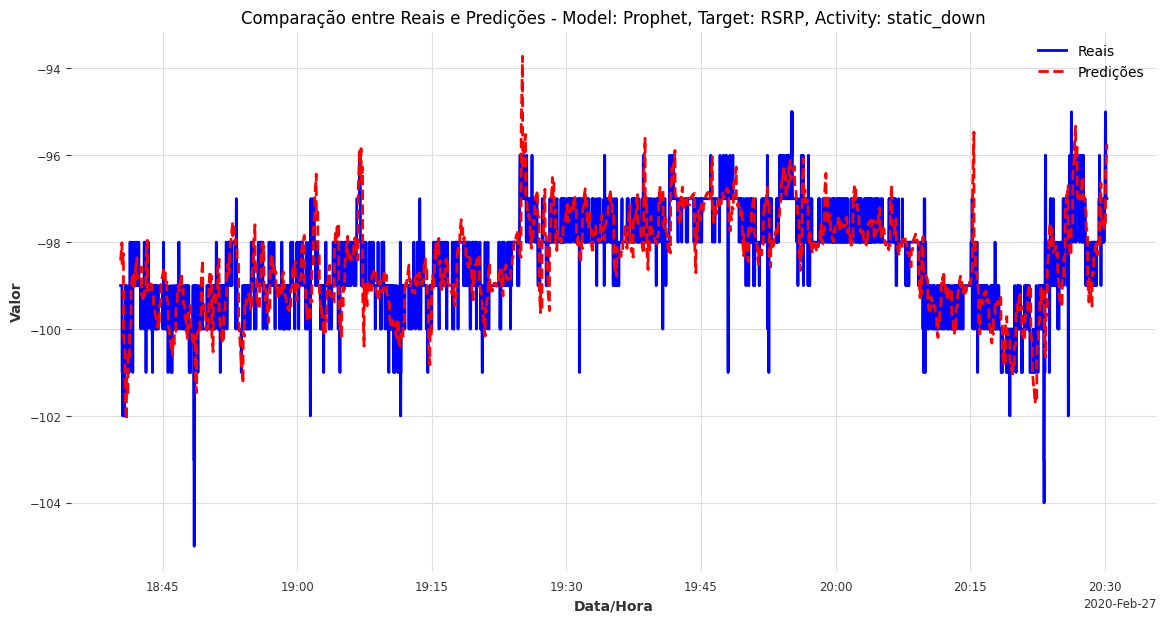

           MAE      RMSE       MSE
4028  0.578923  0.837179  0.700869


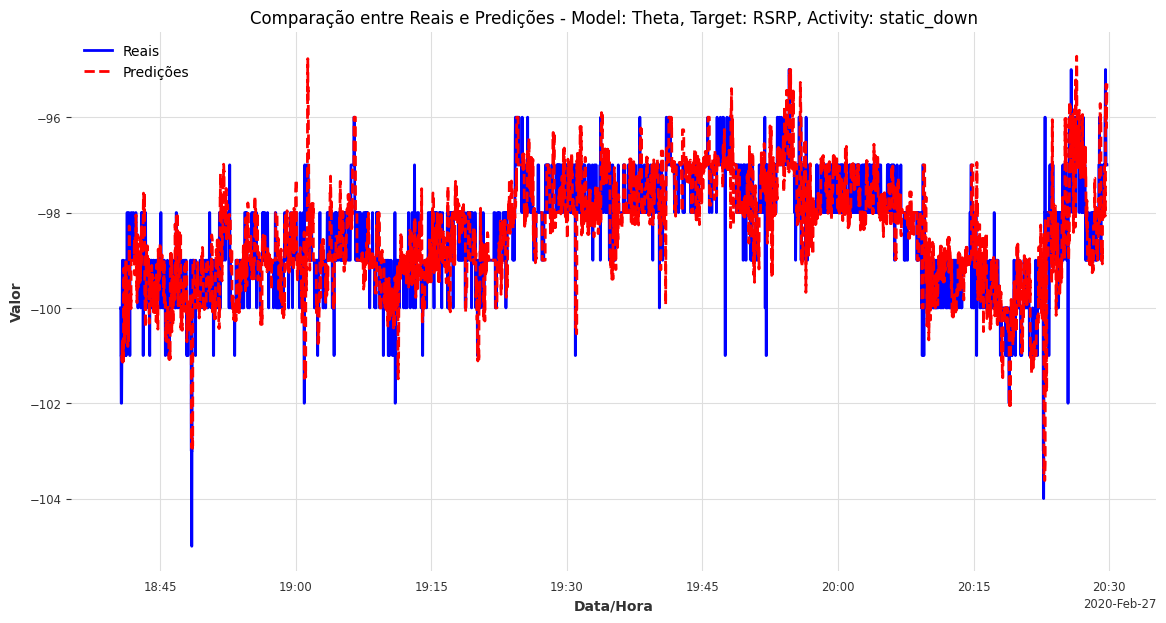

In [20]:
# Exemplo de uso
for model in lowest_mae["Model"].unique():
    plot_actual_vs_preds(lowest_rmse, model=model, target="RSRP", activity="static_down")